# Predictive Model - Telecom Churn - Random Forest - Hyperparameter Tuning
By: Vikram Mathur

# Problem Statement
- Build a model to predict customers at high risk of churn
- The project needs to consider usage based churn for high-value customers

 


# Table Of Contents<br/>

[Importing Required Libraries](#SetupEnvironment)<br/><br/>
1. [**Step 1: Reading and Understanding Data**](#RUD)<br/>
    1.1 [Filter High-Value Customers](#FHVC)<br/>
    > 1.1.1 [Check for Missing Values Pre-Filtering](#CMVPF)<br/>
    > 1.1.2 [Filtering](#F)<br/>

    1.2 [Running Pandas Profiler](#RPP)<br/>
    

2. [**Step 2: Data Preparation & EDA**](#DP)<br/>
    2.1 [Removing Redundant Features](#RFCV)<br/>
    > 2.1.1 [Removing Features with Constant Values](#RFCV)<br/>
    > 2.1.2 [Checking & Removing Features with 75%+ Constant Values](#RF99CV)<br/>
    > 2.1.3 [Evaluating ID Features having all Unique values](#RIFUV)<br/>
    > 2.1.4 [Evaluating Features having High missing values](#EFMV)<br/>
    
    2.2 [Check for Duplicates](#CD)<br/>
    2.3 [Check & Treat Missing Values](#CTMV)<br/>
    > 2.3.1 [Check the ROWS  having some percentage missing values](#RRMV)<br/>
    > 2.3.2 [Handling Missing Data](#CVMV)<br/>
    
    2.4 [Check & Fix Datatypes](#CFD)<br/>
    2.5 [Derive Churn](#DC)<br/>
    2.6 [Outlier Analysis & Treatment](#OAT)<br/>
    2.7 [Feature Analysis (EDA) & New Feature Derivation](#FADVIV)<br/>


3. [**Step 3: Feature Engineering - Data Preparation**](#FEDP)<br/>
    3.1 [Derived Features](#LE)<DF/>


4. [**Step 4: Principal Component Analysis**](#PCA)<br/>
    4.1 [Scaling](#S)<br/>
    4.2 [Applying PCA](#AP)<br/>
    4.3 [Plotting Principal Components](#PPC)<br/>
    4.4 [Scree Plot](#SP)<br/>
    4.5 [Incremental PCA](#IPCA)<br/>
    > 4.5.1 [Correlation Matrix of Principal Components](#CMPC)<br/>
    
    4.6 [Outlier Analysis on Principal Components](#OAPC)<br/>
    

5. [**Step 5: Split Data into Training and Test Sets**](#split)<br/>


6. [**Step 6: Training the Model using Logistic Regression**](#train)<br/>
    6.1 [MinMax Scaling](#MMS)<br/>
    6.2 [RFE](#RFE)<br/>
    6.3 [Building model using statsmodel, for the detailed statistics](#STATS)


7. [**Step 7: Logistic Regression Model Evaluation**](#RA)<br/>
    7.1 [Predictions](#Predictions)<br/>
    7.2 [ROC Curve](#ROC)<br/>
    7.3 [Finding Optimal Cutoff Point](#FOCP)<br/>
    7.4 [Assign Churn](#ALS)<br/>
    

8. [**Step 8: Logistic Regression Predictions and Evaluation on the Test Set**](#MPTS)<br/>


9. [**Step 9: Random Forest - Hyperparameter Tuning**](#RF)<br/>

<a id="SetupEnvironment"></a>
# Loading Required Libraries

In [1]:
import numpy as np
import pandas as pd

import pandas_profiling as pp # pip install pandas-profiling

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

import math
from datetime import datetime

#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# View max columns
pd.options.display.max_columns = None

<a id="RUD"></a>
# 1. Reading and Understanding Data

In [2]:
df_orig = pd.read_csv("telecom_churn_data.csv")

In [3]:
df_orig.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
df_orig.shape

(99999, 226)

<a id="FHVC"></a>
### 1.1 Filter High-Value Customers

<a id="CMVPF"></a>
#### 1.1.1 Check for Missing Values Pre-Filtering

Checking for missing values before filtering out high-value customers

In [5]:
# Missing values
print(round((df_orig['total_rech_amt_6'].isnull().sum()/len(df_orig)) * 100,0))
print(round((df_orig['total_rech_data_6'].isnull().sum()/len(df_orig)) * 100,0))
print(round((df_orig['av_rech_amt_data_6'].isnull().sum()/len(df_orig)) * 100,0))
print(round((df_orig['total_rech_amt_7'].isnull().sum()/len(df_orig)) * 100,0))
print(round((df_orig['total_rech_data_7'].isnull().sum()/len(df_orig)) * 100,0))
print(round((df_orig['av_rech_amt_data_7'].isnull().sum()/len(df_orig)) * 100,0))

0.0
75.0
75.0
0.0
74.0
74.0


Impute these missing values with 0 as it suggests no recharge happened.

In [6]:
lst_impute = ['total_rech_data_6','av_rech_amt_data_6','total_rech_data_7','av_rech_amt_data_7']
df_orig[lst_impute] = df_orig[lst_impute].fillna(0)

<a id="F"></a>
#### 1.1.2 Filter

Average recharge amount in the first two months (the good phase).

In [7]:
df_orig['rech_good_phase'] = (df_orig['total_rech_amt_6']
                              + (df_orig['total_rech_data_6'] * df_orig['av_rech_amt_data_6'])
                              + df_orig['total_rech_amt_7']
                              + (df_orig['total_rech_data_7'] * df_orig['av_rech_amt_data_7']))/2

In [8]:
val_70_percentile = np.percentile(df_orig['rech_good_phase'], 70)
df = df_orig.query('rech_good_phase >= @val_70_percentile')
df.shape

(30001, 227)

    Percentile > 70 returns 29.9k rows

    Percentile >= 70 return 30k rows
    
Choosing Percentile >= 70

In [9]:
df.drop('rech_good_phase',axis=1,inplace=True)

In [10]:
df.info(max_cols=227)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 226 columns):
mobile_number               30001 non-null int64
circle_id                   30001 non-null int64
loc_og_t2o_mou              29777 non-null float64
std_og_t2o_mou              29777 non-null float64
loc_ic_t2o_mou              29777 non-null float64
last_date_of_month_6        30001 non-null object
last_date_of_month_7        29974 non-null object
last_date_of_month_8        29836 non-null object
last_date_of_month_9        29636 non-null object
arpu_6                      30001 non-null float64
arpu_7                      30001 non-null float64
arpu_8                      30001 non-null float64
arpu_9                      30001 non-null float64
onnet_mou_6                 29456 non-null float64
onnet_mou_7                 29464 non-null float64
onnet_mou_8                 28827 non-null float64
onnet_mou_9                 28100 non-null float64
offnet_mou_6                294

<font color="blue">Data Interpretation for dataframe info() 
- There are features having missing value that need to be treated before modelling. Some of these missing value features can be dropped too.

In [11]:
df.describe([0,0.05, 0.25,0.50,0.75,0.90,0.95,0.99])

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   3.000100e+04    30001.0         29777.0         29777.0   
mean    7.001206e+09      109.0             0.0             0.0   
std     6.908784e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
0%      7.000000e+09      109.0             0.0             0.0   
5%      7.000126e+09      109.0             0.0             0.0   
25%     7.000609e+09      109.0             0.0             0.0   
50%     7.001203e+09      109.0             0.0             0.0   
75%     7.001804e+09      109.0             0.0             0.0   
90%     7.002165e+09      109.0             0.0             0.0   
95%     7.002285e+09      109.0             0.0             0.0   
99%     7.002386e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         29777.0  30001.000000  30001.000000  30001.000000  30001.000000   
mean              0.0    558.490824    560.782203    508.597957    467.124246   
std               0.0    460.640461    479.776947    501.961981    501.568240   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
0%                0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
5%                0.0    112.510000    114.273000      9.550000      0.000000   
25%               0.0    309.865000    309.826000    231.473000    189.607000   
50%               0.0    481.694000    480.943000    427.585000    387.817000   
75%               0.0    699.943000    698.315000    661.491000    626.163000   
90%               0.0    994.099000    995.859000    977.345000    935.200000   
95%               0.0   1240.964000   1261.272000   1255.019000   1204.045000   
99%               0.0   1985.115000   1999.500000   1986.622000   1952.983000   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  29456.000000  29464.000000  28827.000000  28100.000000  29456.000000   
mean     265.618262    272.700470    243.646938    225.795019    380.608111   
std      462.493645    482.972367    465.200856    447.196962    484.257474   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
0%         0.000000      0.000000      0.000000      0.000000      0.000000   
5%         0.000000      0.000000      0.000000      0.000000      2.980000   
25%       19.240000     18.155000     14.255000     11.430000     78.575000   
50%       88.060000     86.885000     72.930000     65.340000    229.635000   
75%      297.415000    298.087500    255.025000    229.852500    494.780000   
90%      764.815000    794.980000    685.236000    635.890000    906.830000   
95%     1145.160000   1198.379500   1097.425000   1022.985000   1266.195000   
99%     2162.960000   2216.531900   2187.486400   2138.004700   2341.012500   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  29464.000000  28827.000000  28100.000000   29456.000000   29464.000000   
mean     384.994337    348.723294    323.747627      16.408431      12.872921   
std      500.807874    486.918550    455.596969      76.973057      76.454034   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
0%         0.000000      0.000000      0.000000       0.000000       0.000000   
5%         2.480000      0.683000      0.000000       0.000000       0.000000   
25%       76.040000     58.670000     49.537500       0.000000       0.000000   
50%      227.120000    197.590000    178.185000       0.000000       0.000000   
75%      500.365000    455.385000    419.865000       0.000000       0.000000   
90%      924.672

<font color="blue">Data Interpretation for dataframe describe 
- There are higher values but they don't seem to be incorrect values.
- Need to plot a box plot to visually check the outliers.

<a id="PP"></a>
### 2.2 Running Pandas Profiler

Executing profiler and analyzing results.<br/>
Note: The profiler execution will take time. Kindly wait for the processing to complete.

In [12]:
#profile = pp.ProfileReport(df)
# Generate HTML file for easy viewing for later
#profile.to_file(outputfile="df_profile.html")
#profile

<a id="DP"></a>
# 2. Data Preparation & EDA

<a id="RRF"></a>
<a id="RFCV"></a>
### 2.3 Removing Redundant Features
#### 2.3.1 Removing Features with Constant Values

Checking for features having constant values by checking for the unique count. These features would not help in analysis.

In [13]:
for i in df.columns:
    if (df[i].nunique() == 1):
        print(i, df[i].unique())

circle_id [109]
loc_og_t2o_mou [ 0. nan]
std_og_t2o_mou [ 0. nan]
loc_ic_t2o_mou [ 0. nan]
last_date_of_month_6 ['6/30/2014']
last_date_of_month_7 ['7/31/2014' nan]
last_date_of_month_8 ['8/31/2014' nan]
last_date_of_month_9 ['9/30/2014' nan]
std_og_t2c_mou_6 [nan  0.]
std_og_t2c_mou_7 [nan  0.]
std_og_t2c_mou_8 [ 0. nan]
std_og_t2c_mou_9 [nan  0.]
std_ic_t2o_mou_6 [nan  0.]
std_ic_t2o_mou_7 [nan  0.]
std_ic_t2o_mou_8 [ 0. nan]
std_ic_t2o_mou_9 [nan  0.]


Dropping the above columns as they will not help in analysis

In [14]:
df.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9',
        'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
         'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9',
         'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9',
        'circle_id'], axis=1, inplace= True)

<a id="RF99CV"></a>
#### 2.1.2 Removing Features with 75%+ Constant Value
 - Pandas Profiler suggests the following featuers having a constant value frequency of 75%. Hence we can remove these features. Checking the business sense of these features to take a decision.
 
1. isd_og_mou_6 90.1% zeros
- isd_og_mou_7 
- isd_og_mou_8 
- isd_og_mou_9 87.1% zeros

This feature will add upto the total_og_mou


1. isd_ic_mou_6 has 22867 / 76.3% zeros
- isd_ic_mou_7 has 22527 / 75.1% zeros
- isd_ic_mou_8 has 22511 / 75.1% zeros
- isd_ic_mou_9 has 21978 / 73.3% zeros

This feature will add upto the total_ic_mou


1. monthly_2g_6 has 26651 / 88.9% zeros
- monthly_2g_7 has 26526 / 88.5% zeros
- monthly_2g_8 has 26909 / 89.8% zeros
- monthly_2g_9 has 27335 / 91.2% zeros


1. monthly_3g_6 has 26401 / 88.1% zeros
- monthly_3g_7 has 26330 / 87.8% zeros
- monthly_3g_8 has 26496 / 88.4% zeros
- monthly_3g_9 has 26293 / 87.7% zeros


1. sachet_3g_6 has 28001 / 93.4% zeros
- sachet_3g_7 has 28022 / 93.5% zeros
- sachet_3g_8 has 28252 / 94.2% zeros
- sachet_3g_9 has 28182 / 94.0% zeros


1. sep_vbc_3g has 27398 / 91.4% zeros


1. spl_ic_mou_6 has 22858 / 76.2% zeros
- spl_ic_mou_7 has 28028 / 93.5% zeros
- spl_ic_mou_8 has 26625 / 88.8% zeros
- spl_ic_mou_9 has 21730 / 72.5% zeros


1. std_og_t2f_mou_6 has 24704 / 82.4% zeros
- std_og_t2f_mou_7 has 24812 / 82.8% zeros
- std_og_t2f_mou_8 has 24455 / 81.6% zeros
- std_og_t2f_mou_9 has 23926 / 79.8% zeros


1. vol_3g_mb_6 has 22784 / 76.0% zeros
- vol_3g_mb_7 has 22369 / 74.6% zeros
- vol_3g_mb_8 has 22621 / 75.5% zeros
- vol_3g_mb_9 has 22801 / 76.1% zeros<br/>
    <font color="blue">vol_3g_mb is not getting removed as this feature will be used to derive churn 


1. og_others_6 has 22723 / 75.8% zeros
- og_others_7 has 29512 / 98.4% zeros
- og_others_8 has 28861 / 96.3% zeros
- og_others_9 has 28100 / 93.7% zeros

In [15]:
const_features_75_lst = ['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'isd_og_mou_9',
                         'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'isd_ic_mou_9',
                         'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9',
                         'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9',
                         'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9',
                         'sep_vbc_3g',
                         'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'spl_ic_mou_9',
                         'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9',
                         'og_others_6', 'og_others_7', 'og_others_8', 'og_others_9']

df.drop(const_features_75_lst, axis=1, inplace= True)

In [16]:
df.shape

(30001, 177)

<a id="RIFUV"></a>
#### 2.1.3 Evaluating ID Features having all Unique values

In [17]:
for i in df.columns:
    if (df[i].nunique() == df.shape[0]):
        print(i)

mobile_number


- mobile_number is the only ID column having unique values


<a id="EFMV"></a>
#### 2.1.4 Evaluating Features having High missing values

In [18]:
# Missing values
ser_mv = round((df.isnull().sum()/len(df)) * 100,0)
ser_mv

mobile_number        0.0
arpu_6               0.0
arpu_7               0.0
arpu_8               0.0
arpu_9               0.0
onnet_mou_6          2.0
onnet_mou_7          2.0
onnet_mou_8          4.0
onnet_mou_9          6.0
offnet_mou_6         2.0
offnet_mou_7         2.0
offnet_mou_8         4.0
offnet_mou_9         6.0
roam_ic_mou_6        2.0
roam_ic_mou_7        2.0
roam_ic_mou_8        4.0
roam_ic_mou_9        6.0
roam_og_mou_6        2.0
roam_og_mou_7        2.0
roam_og_mou_8        4.0
roam_og_mou_9        6.0
loc_og_t2t_mou_6     2.0
loc_og_t2t_mou_7     2.0
loc_og_t2t_mou_8     4.0
loc_og_t2t_mou_9     6.0
loc_og_t2m_mou_6     2.0
loc_og_t2m_mou_7     2.0
loc_og_t2m_mou_8     4.0
loc_og_t2m_mou_9     6.0
loc_og_t2f_mou_6     2.0
                    ... 
vol_2g_mb_8          0.0
vol_2g_mb_9          0.0
vol_3g_mb_6          0.0
vol_3g_mb_7          0.0
vol_3g_mb_8          0.0
vol_3g_mb_9          0.0
arpu_3g_6           44.0
arpu_3g_7           43.0
arpu_3g_8           47.0


Getting features having missing values more than 40%

In [19]:
ser_mv[ser_mv >= 40]

date_of_last_rech_data_6    44.0
date_of_last_rech_data_7    43.0
date_of_last_rech_data_8    47.0
date_of_last_rech_data_9    49.0
total_rech_data_8           47.0
total_rech_data_9           49.0
max_rech_data_6             44.0
max_rech_data_7             43.0
max_rech_data_8             47.0
max_rech_data_9             49.0
count_rech_2g_6             44.0
count_rech_2g_7             43.0
count_rech_2g_8             47.0
count_rech_2g_9             49.0
count_rech_3g_6             44.0
count_rech_3g_7             43.0
count_rech_3g_8             47.0
count_rech_3g_9             49.0
av_rech_amt_data_8          47.0
av_rech_amt_data_9          49.0
arpu_3g_6                   44.0
arpu_3g_7                   43.0
arpu_3g_8                   47.0
arpu_3g_9                   49.0
arpu_2g_6                   44.0
arpu_2g_7                   43.0
arpu_2g_8                   47.0
arpu_2g_9                   49.0
night_pck_user_6            44.0
night_pck_user_7            43.0
night_pck_

<font color="blue">Data Interpretation of Missing values in Columns 
 -  Removing following columns having High missing values
     - date_of_last_rech
     - max_rech_data
     - arpu_3g
     - arpu_2g
     - night_pck_user
     - fb_user
     - count_rech_2g
     - count_rech_3g
 - The other columns not being dropped but the value will be imputed as from a business perspective missing value would indicate a Zero value. The columns that we will not drop are:
     - total_rech_data
     - av_rech_amt_data

In [20]:
ser_mv[ser_mv >= 40].index

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_8',
       'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9',
       'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [21]:
df.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
         'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
         'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8','count_rech_2g_9', 
         'count_rech_3g_6', 'count_rech_3g_7','count_rech_3g_8', 'count_rech_3g_9', 
         'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 
         'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9',
         'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8','night_pck_user_9', 
         'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'], 
        axis=1, inplace= True)

In [22]:
df.shape

(30001, 145)

<a id="CD"></a>
### 2.2 Check for Duplicates

In [23]:
#Checking for Duplicates in dataframe
print(df.duplicated().value_counts())

False    30001
dtype: int64


In [24]:
#Checking for Duplicates without the ID columns
print(df.drop('mobile_number',axis=1).duplicated().value_counts())

False    30001
dtype: int64


<font color="blue">Data Interpretation of Duplicates 
- There are no duplicate rows in the dataset

<a id="CTMV"></a>
### 2.3 Check & Treat Missing Values

<a id="RRMV"></a>
#### 2.3.1 Check for ROWS  having some percentage missing values

In [25]:
# count the number of rows having >=30% missing values
print("30% missing values in Rows")
print("Count:", len(df[df.isnull().sum(axis=1) >= len(df.columns)*0.3].index))
print("Percentage:", round(100*(len(df[df.isnull().sum(axis=1) >= len(df.columns)*0.3].index) / len(df.index)),2),"%")

30% missing values in Rows
Count: 1122
Percentage: 3.74 %


<font color="blue">Data Interpretation of Missing Values in Rows 
- There could be customers using a particular service heavily. Removing these rows may not be the best approach. Not removing these rows.

<a id="CVMV"></a>
#### 2.3.2 Handling Missing Data

In [26]:
df.info(max_cols=150)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 145 columns):
mobile_number          30001 non-null int64
arpu_6                 30001 non-null float64
arpu_7                 30001 non-null float64
arpu_8                 30001 non-null float64
arpu_9                 30001 non-null float64
onnet_mou_6            29456 non-null float64
onnet_mou_7            29464 non-null float64
onnet_mou_8            28827 non-null float64
onnet_mou_9            28100 non-null float64
offnet_mou_6           29456 non-null float64
offnet_mou_7           29464 non-null float64
offnet_mou_8           28827 non-null float64
offnet_mou_9           28100 non-null float64
roam_ic_mou_6          29456 non-null float64
roam_ic_mou_7          29464 non-null float64
roam_ic_mou_8          28827 non-null float64
roam_ic_mou_9          28100 non-null float64
roam_og_mou_6          29456 non-null float64
roam_og_mou_7          29464 non-null float64
roam_og_mou_8     

In [27]:
pd.set_option('display.max_rows', 150)

In [28]:
# Missing values
ser_mv = round((df.isnull().sum()/len(df)) * 100,2)
ser_mv[ser_mv>0]

onnet_mou_6             1.82
onnet_mou_7             1.79
onnet_mou_8             3.91
onnet_mou_9             6.34
offnet_mou_6            1.82
offnet_mou_7            1.79
offnet_mou_8            3.91
offnet_mou_9            6.34
roam_ic_mou_6           1.82
roam_ic_mou_7           1.79
roam_ic_mou_8           3.91
roam_ic_mou_9           6.34
roam_og_mou_6           1.82
roam_og_mou_7           1.79
roam_og_mou_8           3.91
roam_og_mou_9           6.34
loc_og_t2t_mou_6        1.82
loc_og_t2t_mou_7        1.79
loc_og_t2t_mou_8        3.91
loc_og_t2t_mou_9        6.34
loc_og_t2m_mou_6        1.82
loc_og_t2m_mou_7        1.79
loc_og_t2m_mou_8        3.91
loc_og_t2m_mou_9        6.34
loc_og_t2f_mou_6        1.82
loc_og_t2f_mou_7        1.79
loc_og_t2f_mou_8        3.91
loc_og_t2f_mou_9        6.34
loc_og_t2c_mou_6        1.82
loc_og_t2c_mou_7        1.79
loc_og_t2c_mou_8        3.91
loc_og_t2c_mou_9        6.34
loc_og_mou_6            1.82
loc_og_mou_7            1.79
loc_og_mou_8  

<font color="blue">Data Interpretation of Missing Values 

Impute following features with 0 as missing value would suggest having zero activity
1. onnet
- offnet
- roam
- loc
- std
- spl
- rech

In [29]:
lst_impute = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
              'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9',
              'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9',
              'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9',
              'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9',
              'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
              'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9',
              'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9',
              'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9',
              'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9',
              'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9',
              'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'std_og_mou_9',
              'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'spl_og_mou_9',
              'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2t_mou_9',
              'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_9',
              'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_t2f_mou_9',
              'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'loc_ic_mou_9',
              'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2t_mou_9',
              'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2m_mou_9',
              'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2f_mou_9',
              'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'std_ic_mou_9', 
              'ic_others_6', 'ic_others_7', 'ic_others_8', 'ic_others_9',
              'total_rech_data_8', 'total_rech_data_9',
              'av_rech_amt_data_8', 'av_rech_amt_data_9']

In [30]:
df[lst_impute] = df[lst_impute].fillna(0)

In [31]:
# Remaining Missing values
ser_mv = round((df.isnull().sum()/len(df)) * 100,2)
ser_mv[ser_mv>0]

date_of_last_rech_6    0.24
date_of_last_rech_7    0.33
date_of_last_rech_8    1.94
date_of_last_rech_9    2.72
dtype: float64

In [32]:
df[df['date_of_last_rech_6'].isnull()][['date_of_last_rech_6','total_rech_amt_6']]

date_of_last_rech_6  total_rech_amt_6
91                    NaN                 0
414                   NaN                 0
6319                  NaN                 0
8125                  NaN                 0
8975                  NaN                 0
9917                  NaN                 0
9944                  NaN                 0
10191                 NaN                 0
10863                 NaN                 0
12987                 NaN                 0
13012                 NaN                 0
13837                 NaN                 0
14441                 NaN                 0
15648                 NaN                 0
20729                 NaN                 0
23795                 NaN                 0
23941                 NaN                 0
25733                 NaN                 0
26016                 NaN                 0
27471                 NaN                 0
28529                 NaN                 0
30674                 NaN                 0
31419                 NaN                 0
32545                 NaN                 0
33078                 NaN                 0
33604                 NaN                 0
34754                 NaN                 0
34833                 NaN                 0
36907                 NaN                 0
37928                 NaN                 0
38204                 NaN                 0
38878                 NaN                 0
39217                 NaN                 0
40172                 NaN                 0
42215                 NaN                 0
42497                 NaN                 0
47642                 NaN                 0
49263                 NaN                 0
50219                 NaN                 0
51932                 NaN                 0
52803                 NaN                 0
53219                 NaN                 0
59096                 NaN                 0
60201                 NaN                 0
60994                 NaN                 0
62905                 NaN                 0
63381                 NaN                 0
66365                 NaN                 0
70648                 NaN                 0
70743                 NaN                 0
71494                 NaN                 0
71518                 NaN                 0
72478                 NaN                 0
74609                 NaN                 0
75803                 NaN                 0
77947                 NaN                 0
78137                 NaN                 0
78674                 NaN                 0
78929                 NaN                 0
80393                 NaN                 0
81691                 NaN                 0
81949                 NaN                 0
88164                 NaN                 0
91250                 NaN                 0
93119                 NaN                 0
95854                 NaN                 0
96676                 NaN                 0
96712                 NaN                 0
97379                 NaN                 0
98121                 NaN                 0
98823                 NaN                 0
99224                 NaN                 0
99398                 NaN                 0

<font color="blue">Data Interpretation of Date features 

The date_of_last_rech is null when the total_rech_amt for the month is null. This suggests that no recharge happened.

These categorical columns related to date are not required for the analysis and can be removed. Information regarding no charge will be fetched from the numerical columns.

In [33]:
df.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9'], axis=1, inplace=True)

In [34]:
df.shape

(30001, 141)

<a id="CFD"></a>
### 2.4 Check & Fix Data Types

In [35]:
# Check for any binary features
for i in df.columns:
    if (df[i].nunique() == 2):
        print(i)

<font color="blue">Data Interpretation of Binary Features 
- There are no binary features in the dataset

In [36]:
# Check for categorical features
for i in df.columns:
    if (df[i].nunique() <= 15):
        print(i)

<font color="blue">Data Interpretation of Categorical Features 
- There are no categorical variables

<a id="#DC"></a>
## 2.5 Derive Churn

In [37]:
lst_9=[]
for i in df.columns:
    if i.endswith('_9'):
        lst_9.append(i)
lst_9

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_mou_9',
 'spl_og_mou_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'sachet_2g_9']

The features that determine usage based churn will be the incoming and the outgoing voice calls and the data usage. The following features will derive churn:-
1. total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [38]:
df['churn'] = (df['total_ic_mou_9']==0) & (df['total_og_mou_9']==0) & (df['vol_2g_mb_9']==0) & (df['vol_3g_mb_9']==0)
df['churn'].head()

0      True
7      True
8     False
21    False
23    False
Name: churn, dtype: bool

In [39]:
#Imputing 0 and 1 for boolean columns instead of No and Yes.
def change_to_bool(col):
    df.loc[df[col] != True, [col]] = '0'
    df.loc[df[col] == True, [col]] = '1'
    df[col] = df[col].astype('int')
        
change_to_bool("churn")

In [40]:
df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','churn']].head()

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9  churn
0             0.00            0.00         0.00         0.00      1
7             0.00            0.00         0.00         0.00      1
8            34.91          142.18         0.00         0.00      0
21          252.61         1031.53         0.00         0.00      0
23          127.48          127.63        13.93       314.74      0

In [41]:
df.drop(lst_9,axis=1,inplace=True)

In [42]:
df.shape

(30001, 108)

### Visualizing Data Imbalance for Churn

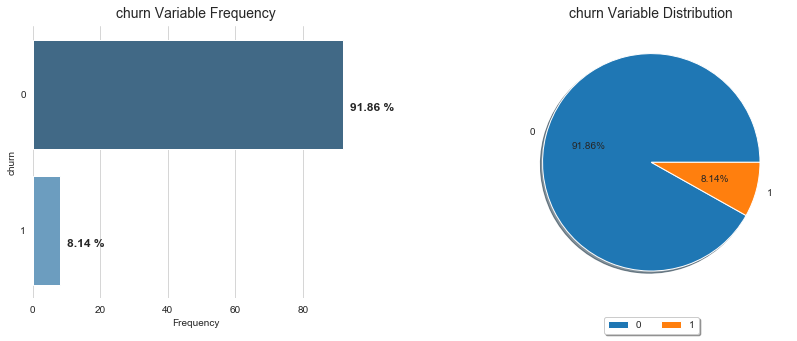

In [43]:
ser_churn = np.round((df["churn"].dropna().value_counts()/len(df["churn"]))*100,2)

plt.figure(figsize=(14,5))
sns.set_style("whitegrid")
grid = plt.GridSpec(1, 2, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.box(on=None)
ax1 = sns.barplot(x=ser_churn.values, y=ser_churn.index, orient="h", palette=("Blues_d"))
plt.title("churn Variable Frequency", size=14, y=1.01)
plt.ylabel("churn")
plt.xlabel("Frequency")
ax1.grid(True, axis="x")
for i in ax1.patches:
    ax1.text(i.get_width()+2, i.get_y()+.52, str(i.get_width()) + ' %',fontsize=12, fontweight='bold')
    
plt.subplot(grid[0, 1])
plt.pie(ser_churn.values, labels=ser_churn.index, autopct='%1.2f%%',shadow=True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
ax = plt.title("churn Variable Distribution", size=14, y=1.01)

#### <font color="blue">Churn Variable - Pattern & Inference 
1. Majority of the <b>customers (91.86%)</b> did not have issues in services and did not churn.
2. About <b>8.14% customers</b> had issues and churned

<b><font color="orange">Data Imbalance = 91.86/8.14 = 11.29% </b>

<a id="OAT"></a>
### 2.6 Outlier Analysis & Treatment

In [44]:
#selecting numerical variables
numerical_features = list(df.select_dtypes(include=['int64','float64']).columns)
numerical_features = list(set(numerical_features) - set(['mobile_number']))
print("Numerical Columns: ", numerical_features)

Numerical Columns:  ['std_og_t2t_mou_7', 'onnet_mou_6', 'max_rech_amt_6', 'std_og_t2m_mou_8', 'sachet_2g_6', 'loc_og_t2c_mou_6', 'std_ic_mou_6', 'std_ic_mou_8', 'total_rech_num_8', 'jun_vbc_3g', 'loc_og_t2c_mou_7', 'std_ic_t2m_mou_6', 'loc_ic_t2f_mou_8', 'offnet_mou_7', 'total_rech_data_6', 'av_rech_amt_data_6', 'std_ic_mou_7', 'loc_og_t2f_mou_8', 'total_og_mou_6', 'aon', 'total_og_mou_8', 'vol_3g_mb_8', 'std_ic_t2f_mou_6', 'av_rech_amt_data_7', 'std_ic_t2m_mou_7', 'std_og_t2t_mou_6', 'loc_og_mou_6', 'total_rech_amt_6', 'onnet_mou_8', 'std_ic_t2t_mou_8', 'vol_2g_mb_8', 'total_rech_num_6', 'loc_og_t2m_mou_8', 'loc_ic_mou_8', 'std_og_t2m_mou_7', 'total_rech_amt_7', 'roam_og_mou_6', 'loc_og_mou_7', 'loc_ic_t2f_mou_6', 'loc_og_t2m_mou_6', 'loc_ic_t2t_mou_6', 'max_rech_amt_7', 'loc_ic_t2m_mou_7', 'roam_ic_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'jul_vbc_3g', 'loc_og_t2f_mou_6', 'std_ic_t2m_mou_8', 'ic_others_7', 'offnet_mou_6', 'spl_og_mou_8', 'spl_og_mou_7', 'total_ic_mou_6', 'loc_og_t

In [45]:
df[numerical_features].describe([0,0.05, 0.10,0.25,0.50,0.75,0.90,0.95,0.99])

std_og_t2t_mou_7   onnet_mou_6  max_rech_amt_6  std_og_t2m_mou_8  \
count      30001.000000  30001.000000    30001.000000      30001.000000   
mean         174.233972    260.793024      169.284824        157.350068   
std          421.190177    459.644368      175.315958        409.100284   
min            0.000000      0.000000        0.000000          0.000000   
0%             0.000000      0.000000        0.000000          0.000000   
5%             0.000000      0.000000       25.000000          0.000000   
10%            0.000000      0.700000       37.000000          0.000000   
25%            0.000000     17.080000      110.000000          0.000000   
50%            2.680000     84.580000      120.000000          9.460000   
75%          116.610000    290.440000      200.000000        117.780000   
90%          599.340000    754.160000      274.000000        464.890000   
95%         1011.680000   1135.440000      459.000000        842.830000   
99%         1917.140000   2151.740000     1000.000000       1893.710000   
max         8133.660000   7376.710000     4010.000000      13950.040000   

        sachet_2g_6  loc_og_t2c_mou_6  std_ic_mou_6  std_ic_mou_8  \
count  30001.000000      30001.000000  30001.000000  30001.000000   
mean       1.066064          1.575104     46.789434     44.401653   
std        2.507197          6.303385    137.501469    138.813305   
min        0.000000          0.000000      0.000000      0.000000   
0%         0.000000          0.000000      0.000000      0.000000   
5%         0.000000          0.000000      0.000000      0.000000   
10%        0.000000          0.000000      0.000000      0.000000   
25%        0.000000          0.000000      1.030000      0.410000   
50%        0.000000          0.000000     11.410000      9.290000   
75%        1.000000          0.000000     41.490000     38.380000   
90%        4.000000          4.210000    107.340000     99.980000   
95%        6.000000          8.880000    185.940000    181.080000   
99%       12.000000         24.940000    546.860000    539.410000   
max       42.000000        271.440000   5459.630000   5957.140000   

       total_rech_num_8    jun_vbc_3g  loc_og_t2c_mou_7  std_ic_t2m_mou_6  \
count      30001.000000  30001.000000      30001.000000      30001.000000   
mean           9.972868    158.523962          1.889875         29.195215   
std            9.274370    416.734860          9.158984         98.210477   
min            0.000000      0.000000          0.000000          0.000000   
0%             0.000000      0.000000          0.000000          0.000000   
5%             1.000000      0.000000          0.000000          0.000000   
10%            2.000000      0.000000          0.000000          0.000000   
25%            4.000000      0.000000          0.000000          0.000000   
50%            8.000000      0.000000          0.000000          5.000000   
75%           13.000000     98.440000          0.100000         23.600000   
90%           21.000000    532.610000          5.010000         67.540000   
95%           28.000000    885.240000         10.190000        120.430000   
99%           45.000000   1946.290000         27.980000        363.710000   
max          196.000000  11166.210000        569.710000       4630.230000   

       loc_ic_t2f_mou_8  offnet_mou_7  total_rech_data_6  av_rech_amt_data_6  \
count      30001.000000  30001.000000       30001.000000        30001.000000   
mean          14.403175    378.103169           1.667711          130.654329   
std           43.305191    498.923555           2.831233          200.328052   
min            0.000000      0.000000           0.000000            0.000000   
0%             0.000000      0.000000           0.000000            0.000000   
5%             0.000000      0.050000           0.000000            0.000000   
10%            0.000000     10.430000           0.000000            0.000000   
25%            0.000000     69.910000           0

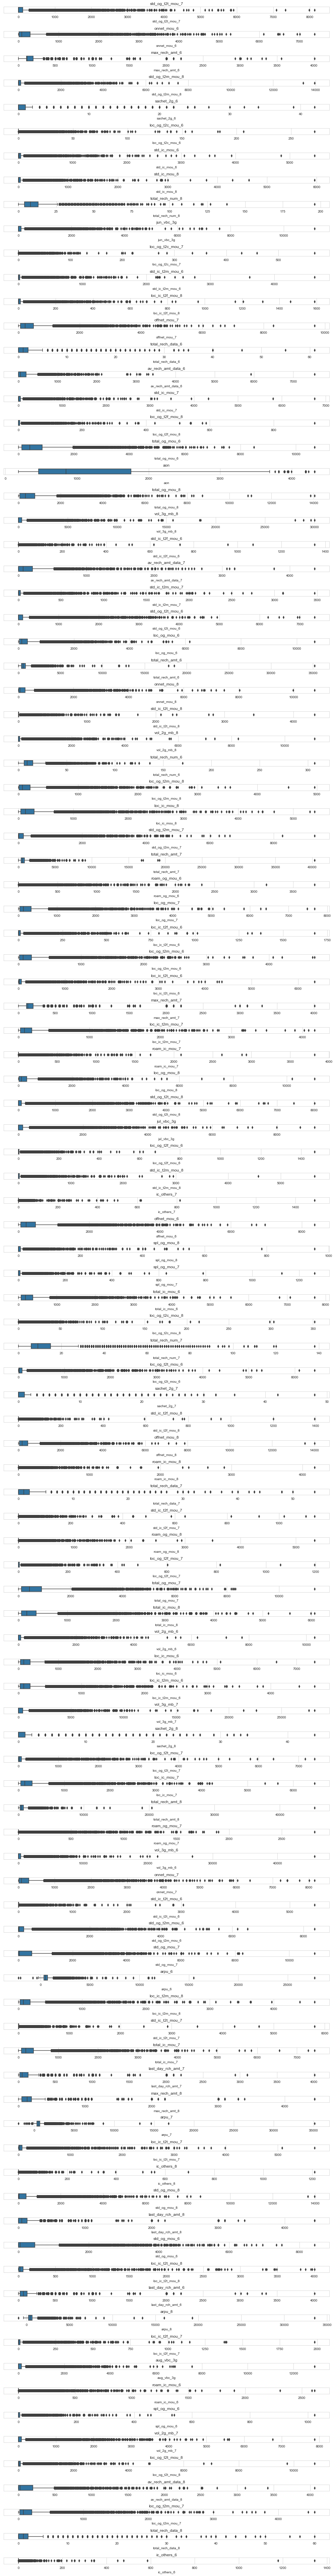

In [46]:
# Generic function to plot outliers based on dataframe and numeric columns
def check_outliers_continuous(df, cols):
    f, ax = plt.subplots(nrows=len(cols), figsize=(14,len(cols)+1))
    for i in range(0,len(cols)):
        sns.boxplot(df[cols[i]].dropna(), ax=ax[i])
        ax[i].title.set_text(cols[i])
    plt.tight_layout()
    plt.show()
    
check_outliers_continuous(df, numerical_features)

In [47]:
def treat_outliers(df, col):
    q1, q3 = np.percentile(df[col].dropna(), [5, 95])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    #print(col, lower_bound, upper_bound)
    df[col][df[col] <= lower_bound] = lower_bound
    df[col][df[col] >= upper_bound] = upper_bound

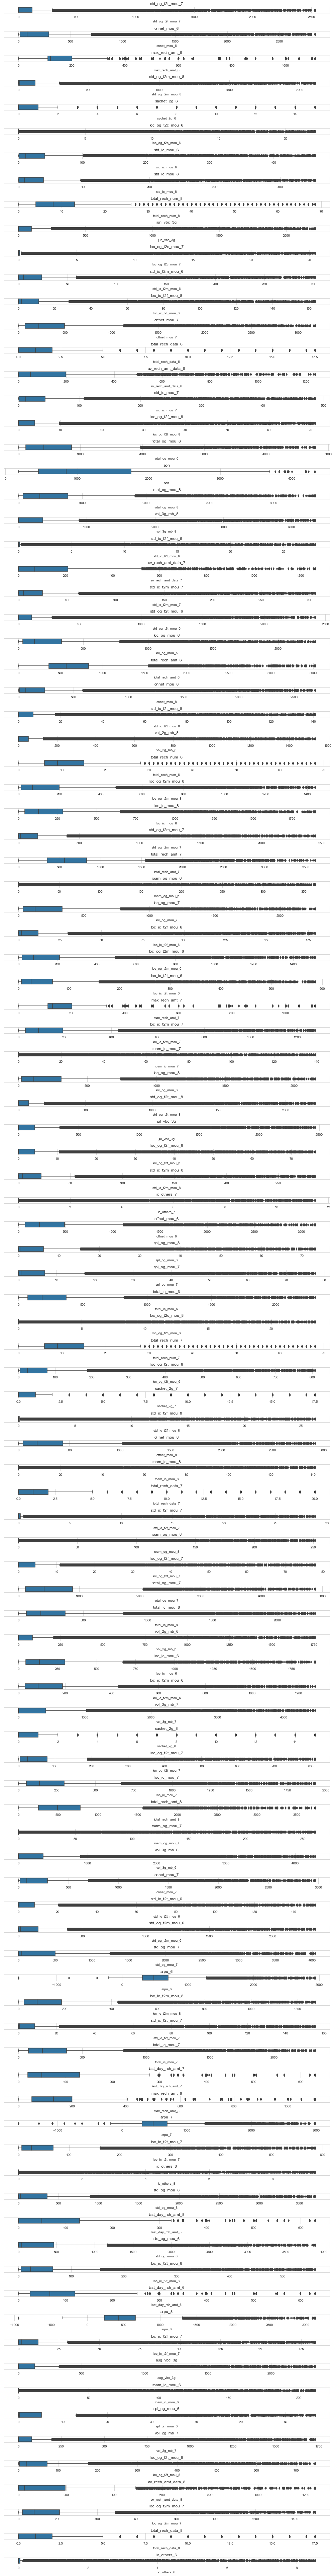

In [48]:
for i in numerical_features:
    treat_outliers(df, i)

check_outliers_continuous(df, numerical_features)

<a id="FADVIV"></a>
## 2.7 Feature Analysis

In [49]:
# Custom function for plotting histogram
def histogramNboxplot(df, col_name):
    plt.figure(figsize=(14,3))
    plt.subplot(131)
    plt.hist(df[col_name + "_6"],alpha=0.7, ec='black')
    plt.xlabel(col_name + "_6")
    plt.ylabel('frequency')
    plt.title(col_name + "_6" + ' Frequency')
    
    plt.subplot(132)
    plt.hist(df[col_name + "_7"],alpha=0.7, ec='black')
    plt.xlabel(col_name + "_7")
    plt.ylabel('frequency')
    plt.title(col_name + "_7" + ' Frequency')
    
    plt.subplot(133)
    plt.hist(df[col_name + "_8"],alpha=0.7, ec='black')
    plt.xlabel(col_name + "_8")
    plt.ylabel('frequency')
    plt.title(col_name + "_8" + ' Frequency')
    plt.plot()
    
    # Plotting box plots for churn
    plt.figure(figsize=(14,3))
    plt.subplot(131)
    sns.boxplot(x='churn',y=col_name + "_6",data=df)
    plt.subplot(132)
    sns.boxplot(x='churn',y=col_name + "_7",data=df)
    plt.subplot(133)
    sns.boxplot(x='churn',y=col_name + "_8",data=df)
    plt.show()

def topcorr(df,cols):
    df_corr = pd.DataFrame(round(df[cols].corr()*100).unstack().reset_index())
    df_corr.rename(columns={'level_0':'Feature_1','level_1':'Feature_2',0:'Correlation'}, inplace=True)
    df_corr = df_corr[df_corr['Feature_1'] != df_corr['Feature_2']]
    df_corr = df_corr[df_corr['Feature_1'] != 'price']
    df_corr = df_corr[df_corr['Feature_2'] != 'price']
    df_corr.drop_duplicates(subset='Correlation', inplace=True)
    print("TOP 10 HIGH POSITIVE CORRELATION %","\n")
    print(df_corr.sort_values(by='Correlation',ascending=False).head(10))
    print("\nTOP 10 HIGH NEGATIVE CORRELATION %","\n")
    print(df_corr.sort_values(by='Correlation',ascending=True).head(10))

### 2.7.1 Analyzing Outgoing Features

In [50]:
og_features=[]
for i in df.columns:
    if 'og' in i:
        og_features.append(i[0:i.rfind("_")])
og_features = list(set(og_features))
og_features

['loc_og_t2m_mou',
 'loc_og_mou',
 'std_og_t2t_mou',
 'total_og_mou',
 'std_og_t2m_mou',
 'loc_og_t2c_mou',
 'loc_og_t2f_mou',
 'spl_og_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'std_og_mou']

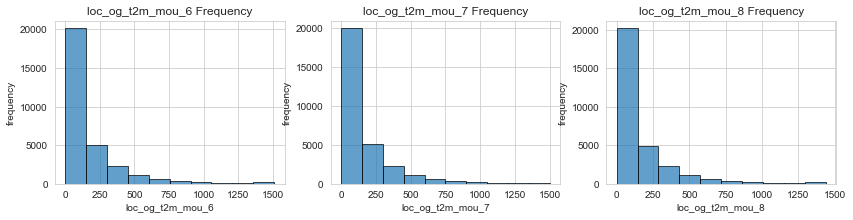

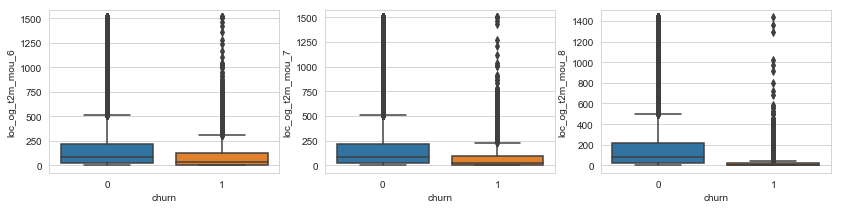

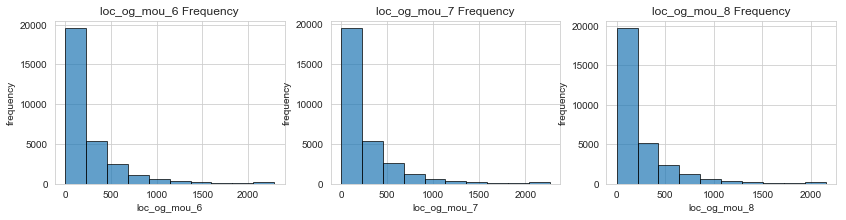

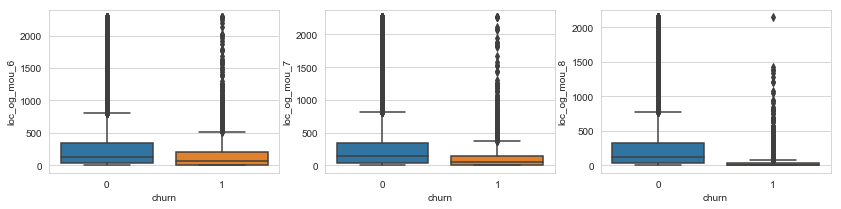

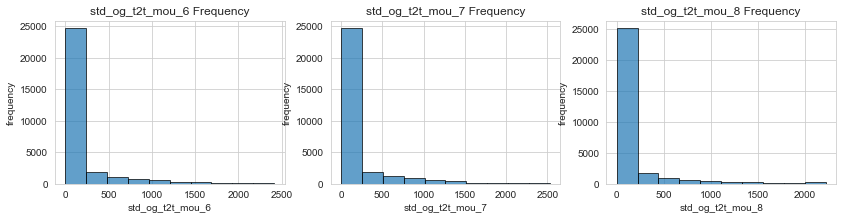

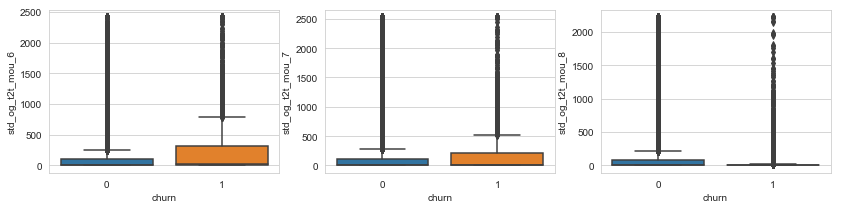

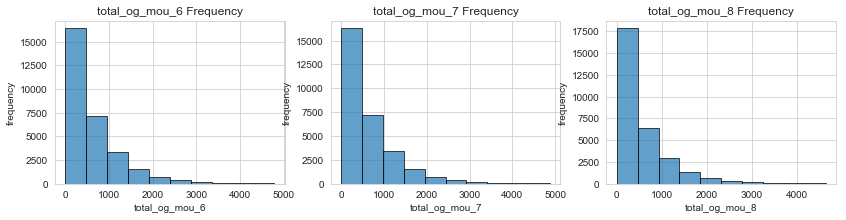

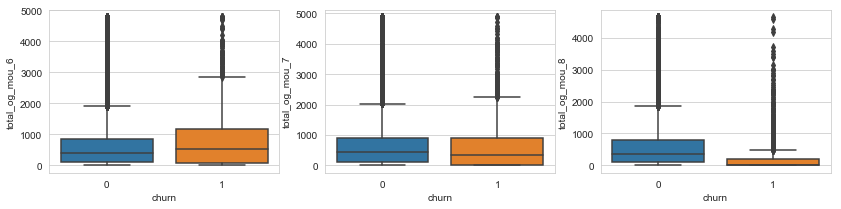

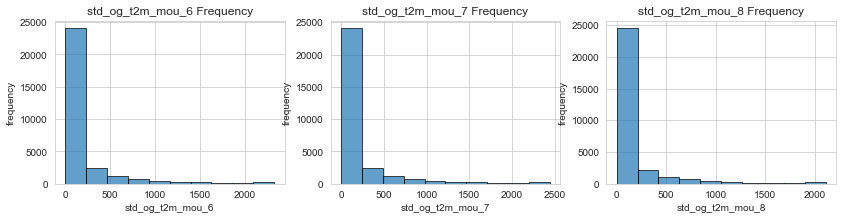

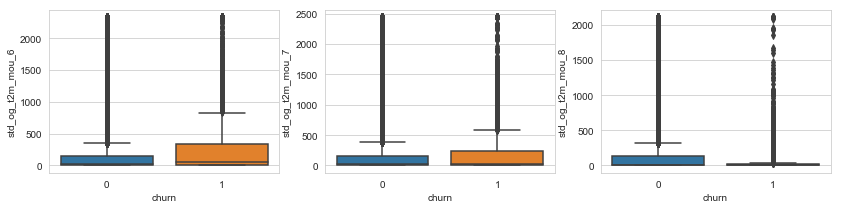

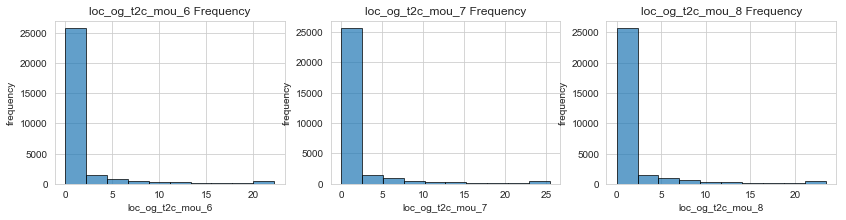

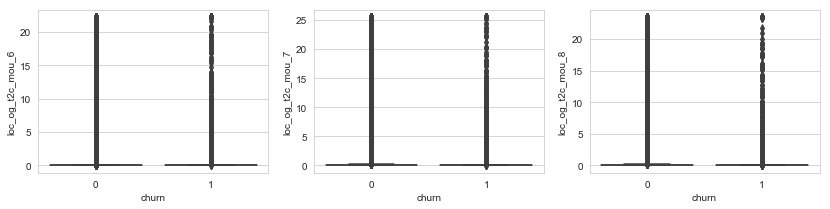

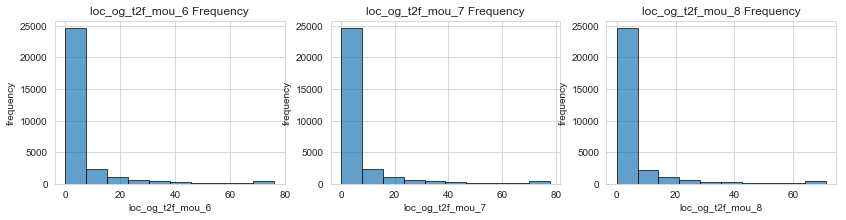

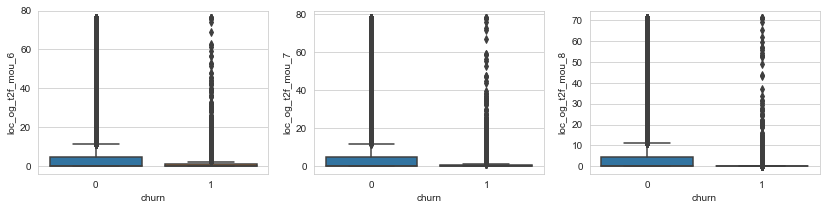

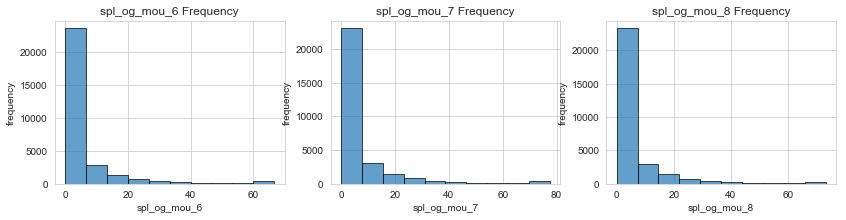

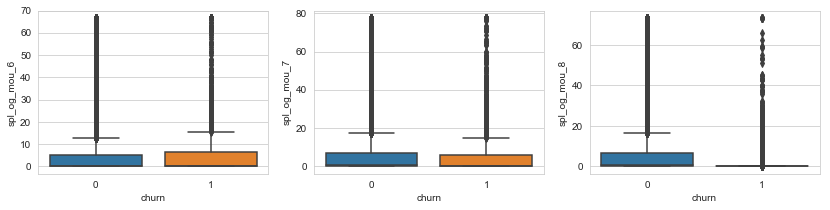

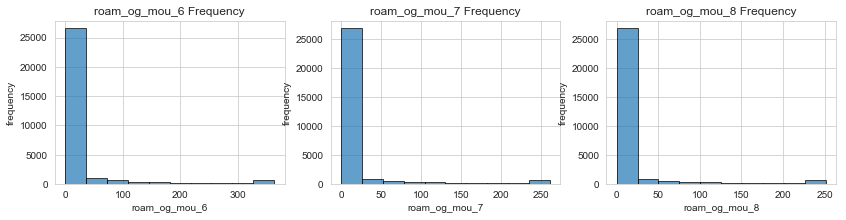

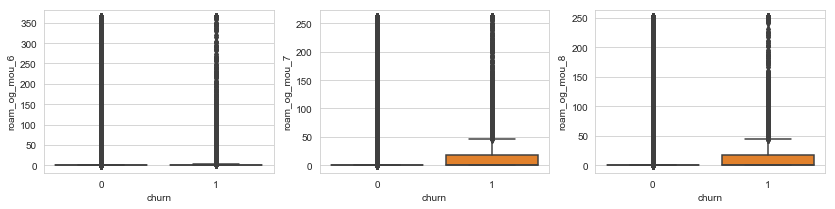

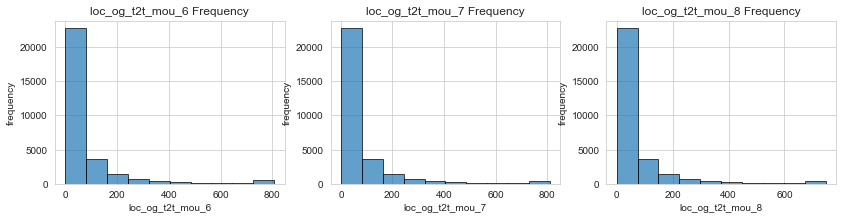

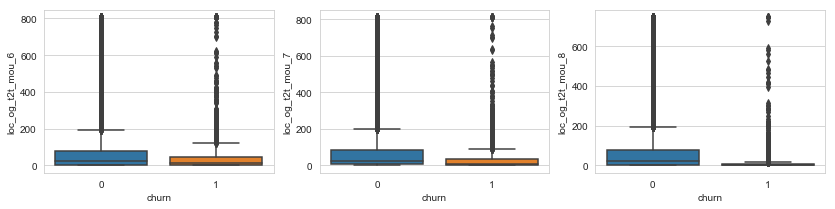

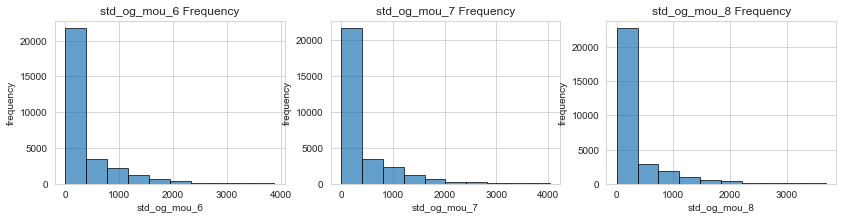

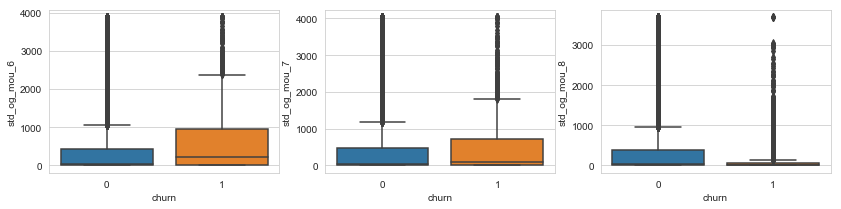

In [51]:
for i in og_features:
    histogramNboxplot(df, i)

<font color="blue">Data Interpretation of og features 


The following features don't seem to indicate any business value based on the data visualization as the value is nearly 0:
 - loc_og_t2c_mou


- loc_og_t2m_mou
 - Decrease in the in month 7 and then 8 is leading to churn.
 - The frequency is higher between 0 to 125 range.


- std_og_t2t_mou
 - Seems to have similar value for churn and no churn cases


- total_og_mou
 - In Month 6 good phase the churn is lower
 - Decrease in the in month 7 and then 8 is leading to churn.

- loc_og_mou
 - Decrease in the in month 7 and then 8 is leading to churn.


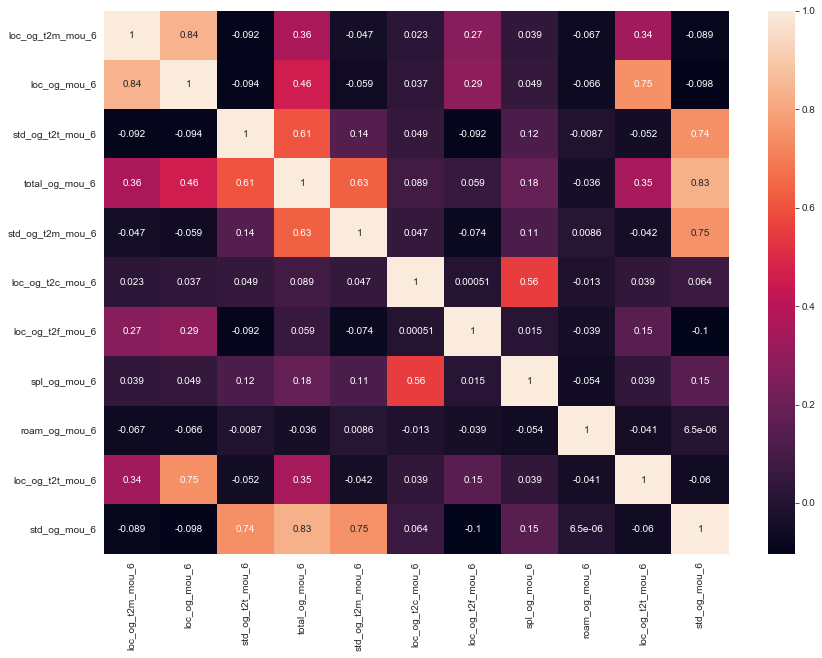

In [52]:
og_features_6  = []
for i in og_features:
    og_features_6.append(i + "_6")

#plotting a heat map to view correlation
plt.figure(figsize=(14,10))
sns.heatmap(df[og_features_6].corr(),annot=True)
plt.show()

In [53]:
topcorr(df,og_features_6)

TOP 10 HIGH POSITIVE CORRELATION % 

           Feature_1         Feature_2  Correlation
1   loc_og_t2m_mou_6      loc_og_mou_6         84.0
43    total_og_mou_6      std_og_mou_6         83.0
20      loc_og_mou_6  loc_og_t2t_mou_6         75.0
32  std_og_t2t_mou_6      std_og_mou_6         74.0
37    total_og_mou_6  std_og_t2m_mou_6         63.0
25  std_og_t2t_mou_6    total_og_mou_6         61.0
62  loc_og_t2c_mou_6      spl_og_mou_6         56.0
14      loc_og_mou_6    total_og_mou_6         46.0
3   loc_og_t2m_mou_6    total_og_mou_6         36.0
42    total_og_mou_6  loc_og_t2t_mou_6         35.0

TOP 10 HIGH NEGATIVE CORRELATION % 

           Feature_1         Feature_2  Correlation
21      loc_og_mou_6      std_og_mou_6        -10.0
2   loc_og_t2m_mou_6  std_og_t2t_mou_6         -9.0
8   loc_og_t2m_mou_6     roam_og_mou_6         -7.0
15      loc_og_mou_6  std_og_t2m_mou_6         -6.0
4   loc_og_t2m_mou_6  std_og_t2m_mou_6         -5.0
41    total_og_mou_6     roam_og_mou_6   

<font color="blue">Data Interpretation of og features correlation 

Following features have high correlation:
- loc_og_t2m_mou_6 and loc_og_mou_6
- total_og_mou_6 and std_og_mou_6
- loc_og_mou_6 and loc_og_t2t_mou_6
- std_og_t2t_mou_6 and std_og_mou_6

#### Checking Derived Features and Formulas

In [54]:
df[['total_og_mou_6','std_og_mou_6','loc_og_mou_6','spl_og_mou_6']].head()

total_og_mou_6  std_og_mou_6  loc_og_mou_6  spl_og_mou_6
0             0.00          0.00          0.00           0.0
7           487.53         60.86        422.16           4.5
8           508.36        130.26        378.09           0.0
21          860.34        763.29         97.04           0.0
23          134.38          2.36        131.91           0.1

<font color="blue">Data Interpretation for Outgoing feature 

Based on the analysis we can infer the comibination of features as:-

    total_og_mou = std_og_mou + loc_og_mou + spl_og_mou + isd_og_mou + og_others

where,

    std_og_mou = std_og_t2m_mou + std_og_t2t_mou + std_og_t2f_mou + std_og_loc_mou
    loc_og_mou = loc_og_t2m_mou + loc_og_t2t_mou_6 + loc_og_t2f_mou + loc_og_2tc_mou
    
- Some of these features were dropped as they contained constant value for most of the entries and hence would have not aided in the analysis.
- There is a possibiity of dropping the combination variables as they are derived features itself. However, not dropping right now.

### 2.7.2 Analyzing Incoming Features

In [55]:
ic_features=[]
for i in df.columns:
    if 'ic' in i:
        ic_features.append(i[0:i.rfind("_")])
ic_features = list(set(ic_features))
ic_features

['loc_ic_t2t_mou',
 'std_ic_t2f_mou',
 'loc_ic_t2m_mou',
 'loc_ic_mou',
 'loc_ic_t2f_mou',
 'roam_ic_mou',
 'std_ic_t2t_mou',
 'std_ic_mou',
 'ic_others',
 'total_ic_mou',
 'std_ic_t2m_mou']

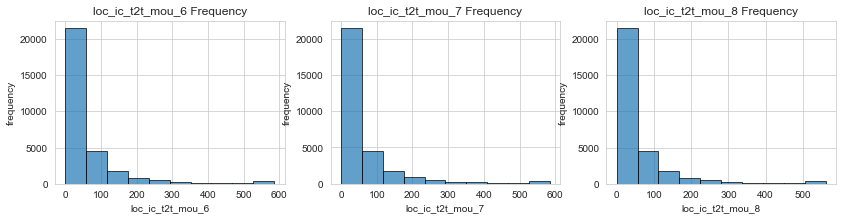

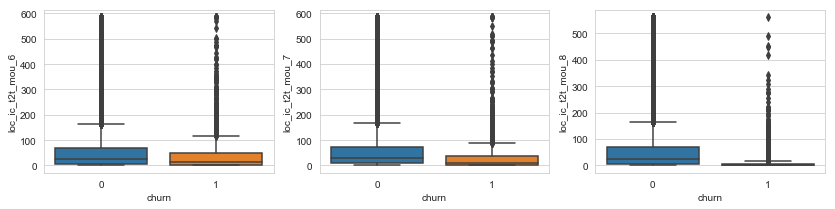

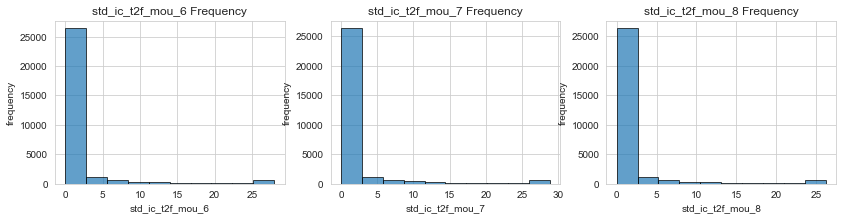

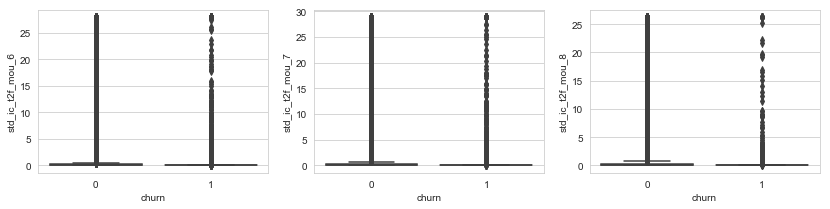

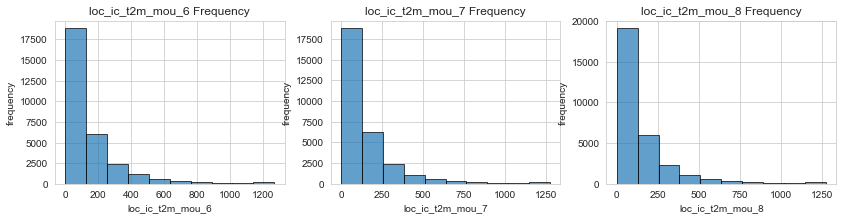

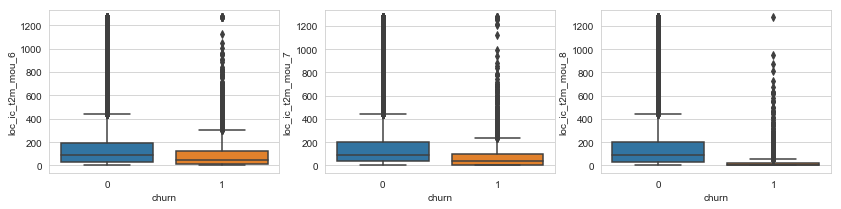

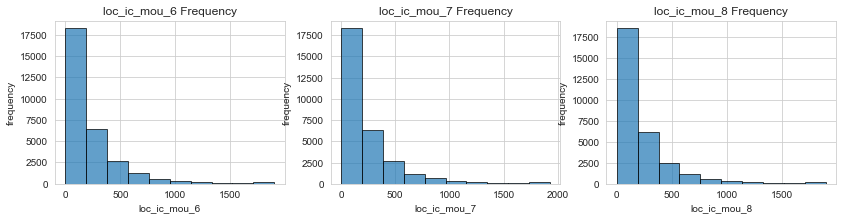

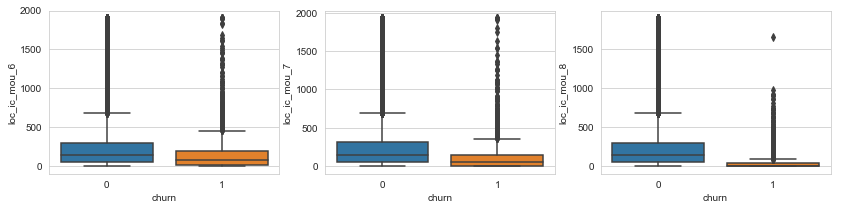

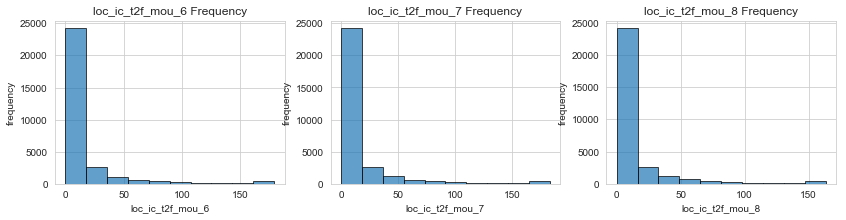

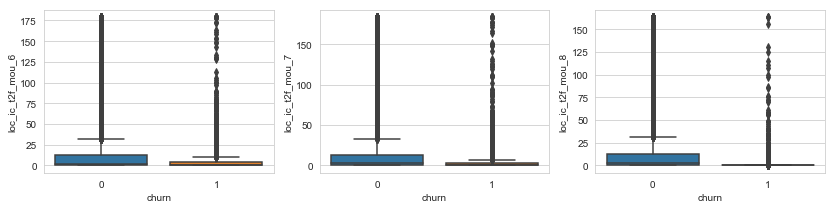

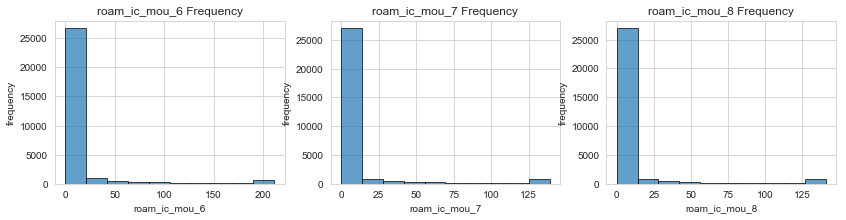

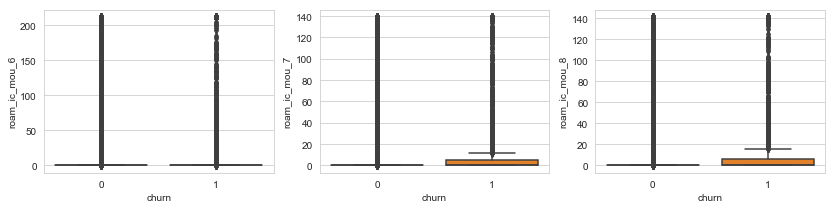

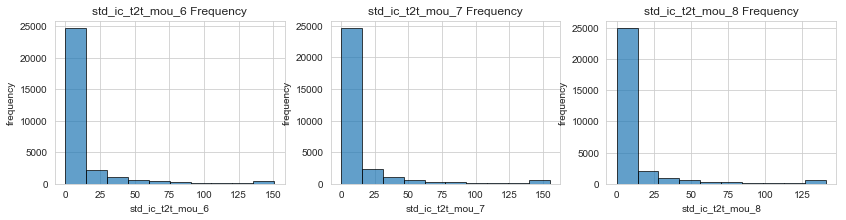

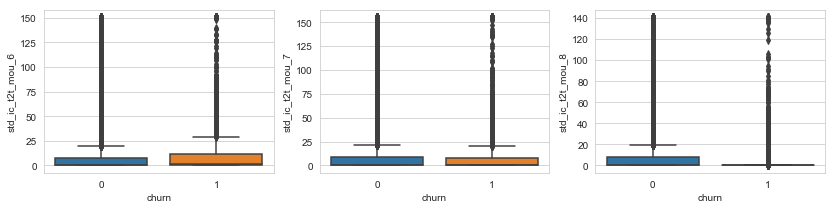

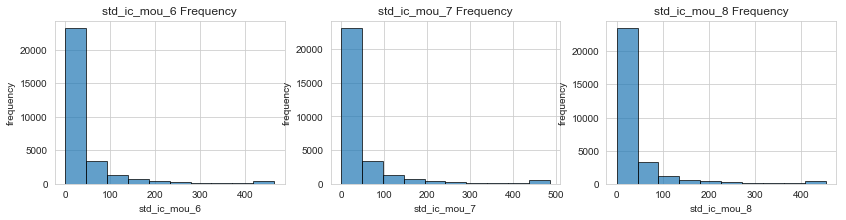

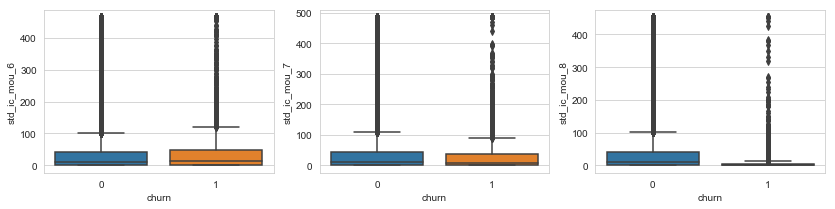

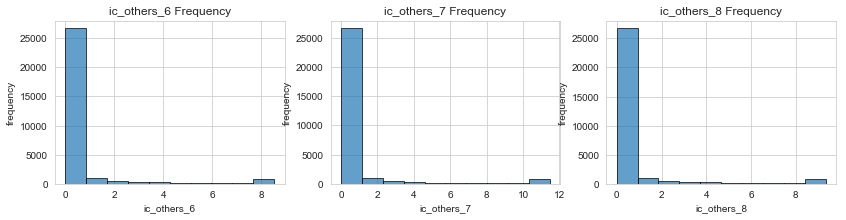

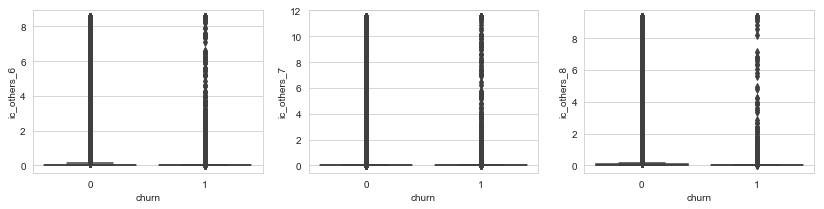

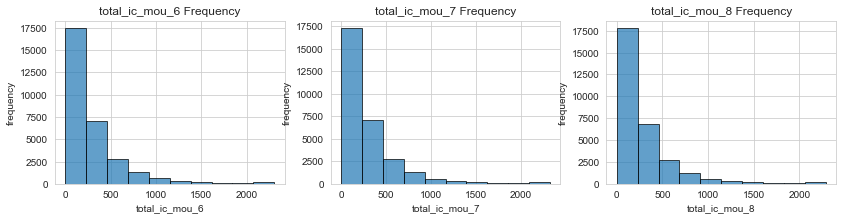

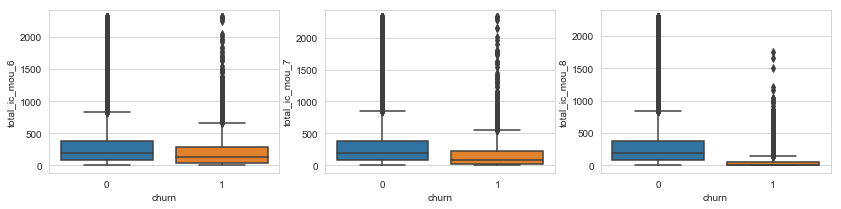

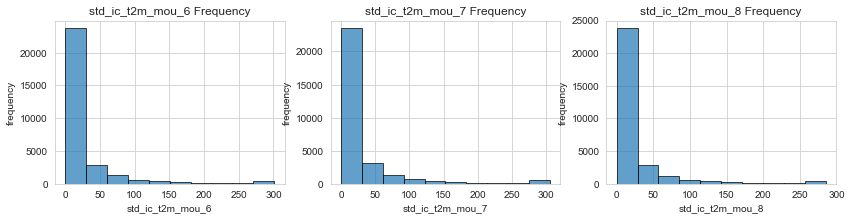

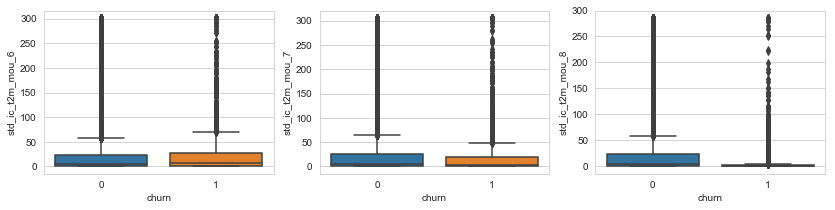

In [56]:
for i in ic_features:
    histogramNboxplot(df, i)

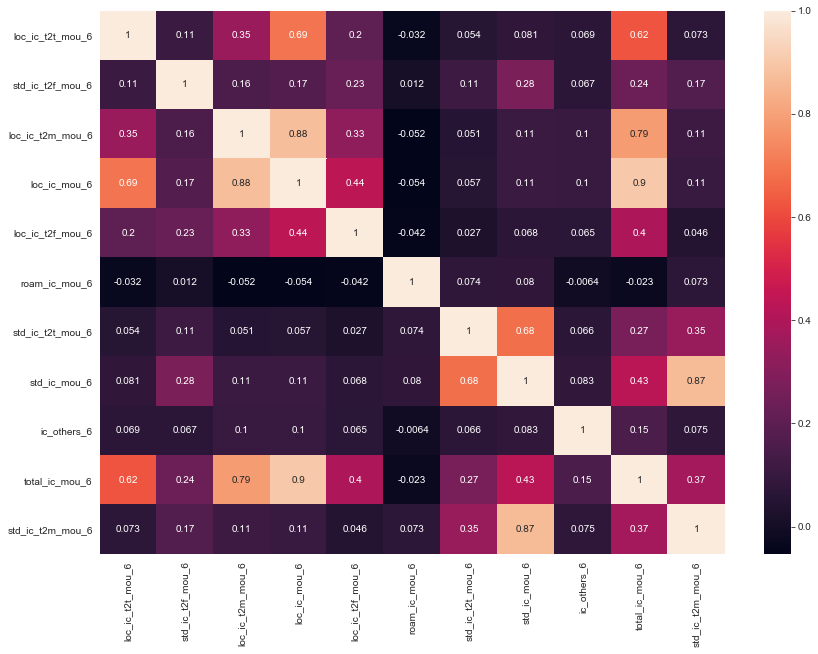

In [57]:
ic_features_6  = []
for i in ic_features:
    ic_features_6.append(i + "_6")

#plotting a heat map to view correlation
plt.figure(figsize=(14,10))
sns.heatmap(df[ic_features_6].corr(),annot=True)
plt.show()

In [58]:
topcorr(df,ic_features_6)

TOP 10 HIGH POSITIVE CORRELATION % 

           Feature_1         Feature_2  Correlation
42      loc_ic_mou_6    total_ic_mou_6         90.0
25  loc_ic_t2m_mou_6      loc_ic_mou_6         88.0
87      std_ic_mou_6  std_ic_t2m_mou_6         87.0
31  loc_ic_t2m_mou_6    total_ic_mou_6         79.0
3   loc_ic_t2t_mou_6      loc_ic_mou_6         69.0
73  std_ic_t2t_mou_6      std_ic_mou_6         68.0
9   loc_ic_t2t_mou_6    total_ic_mou_6         62.0
37      loc_ic_mou_6  loc_ic_t2f_mou_6         44.0
86      std_ic_mou_6    total_ic_mou_6         43.0
53  loc_ic_t2f_mou_6    total_ic_mou_6         40.0

TOP 10 HIGH NEGATIVE CORRELATION % 

           Feature_1         Feature_2  Correlation
27  loc_ic_t2m_mou_6     roam_ic_mou_6         -5.0
49  loc_ic_t2f_mou_6     roam_ic_mou_6         -4.0
5   loc_ic_t2t_mou_6     roam_ic_mou_6         -3.0
64     roam_ic_mou_6    total_ic_mou_6         -2.0
63     roam_ic_mou_6       ic_others_6         -1.0
16  std_ic_t2f_mou_6     roam_ic_mou_6   

#### Checking Derived Features and Formulas

In [59]:
df[['total_ic_mou_6','loc_ic_mou_6','roam_ic_mou_6','spl_og_mou_6','std_ic_mou_6']].head()

total_ic_mou_6  loc_ic_mou_6  roam_ic_mou_6  spl_og_mou_6  std_ic_mou_6
0             0.00          0.00           0.00           0.0          0.00
7           626.46        427.88          16.23           4.5        180.54
8           103.86         81.43           0.00           0.0         22.43
21          207.09        125.33           0.00           0.0         81.76
23          119.58        116.63           0.00           0.1          2.94

<font color="blue">Data Interpretation for Incoming Feature 

Based on the analysis we can infer the comibination of features as:-

    total_ic_mou = loc_ic_mou + roam_ic_mou_6 + isd_ic_mou + spl_ic_mou + std_ic_mou

where,

    loc_ic_mou = loc_ic_t2t_mou + loc_ic_t2m_mou + loc_ic_t2f_mou + loc_ic_t2c_mou
    std_ic_mou = std_ic_t2t_mou + std_ic_t2m_mou + std_ic_t2f_mou + std_ic_t2c_mou    
    
- Some of these features were dropped as they contained constant value for most of the entries and hence would have not aided in the analysis.
- There is a possibiity of dropping the combination variables as they are derived features itself. However, not dropping right now.

### 2.7.3 Analyzing Recharge Features

In [60]:
rech_features=[]
for i in df.columns:
    if 'rech' in i:
        rech_features.append(i)
rech_features

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

#### Deriving New Feature

In [61]:
df['total_rech_data_amt_6'] = df['total_rech_data_6'] * df['av_rech_amt_data_6']
df['total_rech_data_amt_7'] = df['total_rech_data_7'] * df['av_rech_amt_data_7']
df['total_rech_data_amt_8'] = df['total_rech_data_8'] * df['av_rech_amt_data_8']

In [62]:
rech_features.append('total_rech_data_amt_6')
rech_features.append('total_rech_data_amt_7')
rech_features.append('total_rech_data_amt_8')

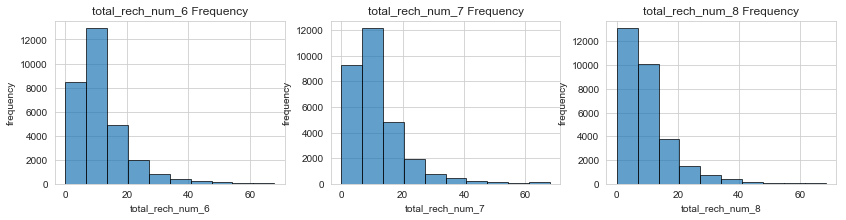

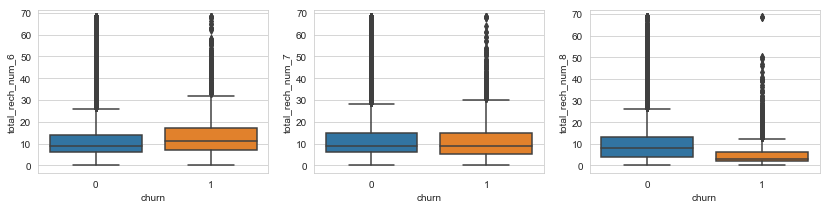

In [63]:
histogramNboxplot(df, 'total_rech_num')

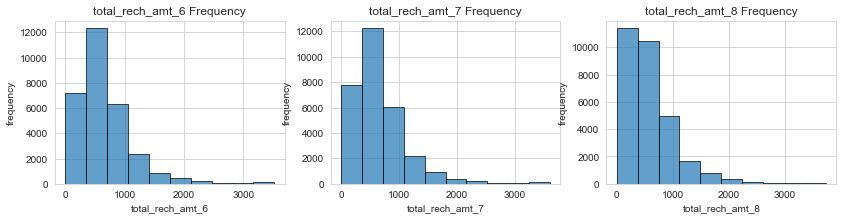

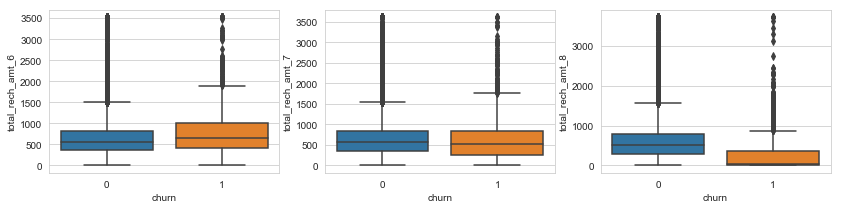

In [64]:
histogramNboxplot(df, 'total_rech_amt')

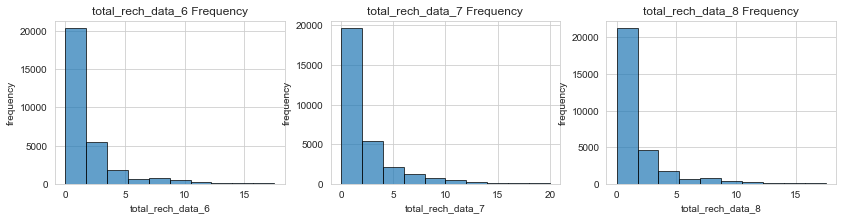

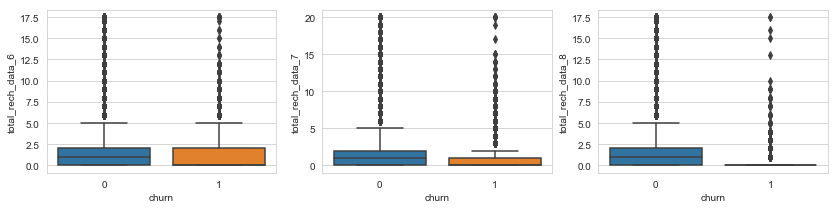

In [65]:
histogramNboxplot(df, 'total_rech_data')

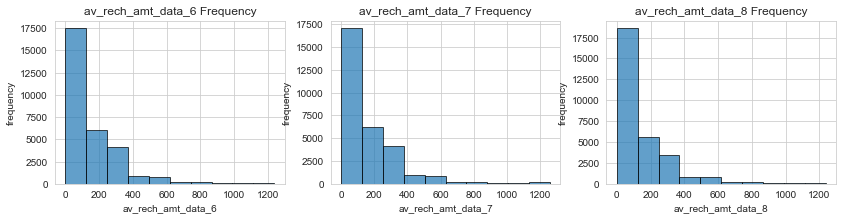

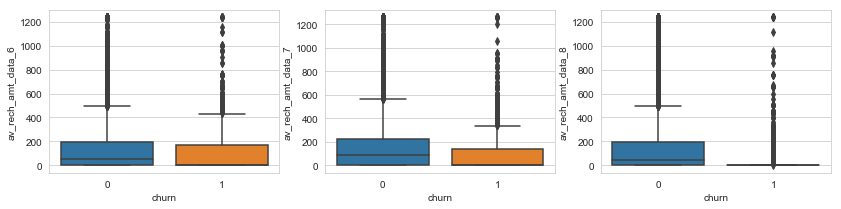

In [66]:
histogramNboxplot(df, 'av_rech_amt_data')

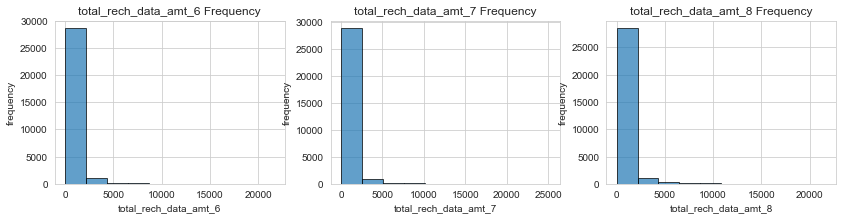

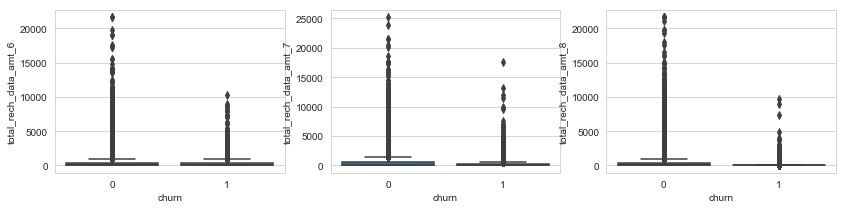

In [67]:
histogramNboxplot(df, 'total_rech_data_amt')

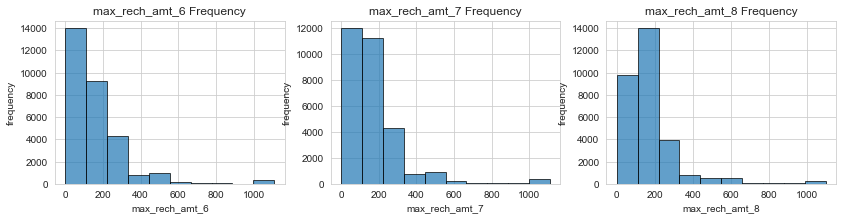

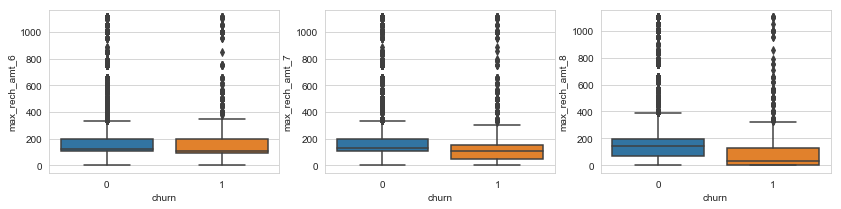

In [68]:
histogramNboxplot(df, 'max_rech_amt')

<font color="blue">Data Interpretation of Recharge Features 
- By the action phase there is a reduction in the recharge
- The reduction of recharge in the action phase is leading to churn. As the recharge decreases the churn increases

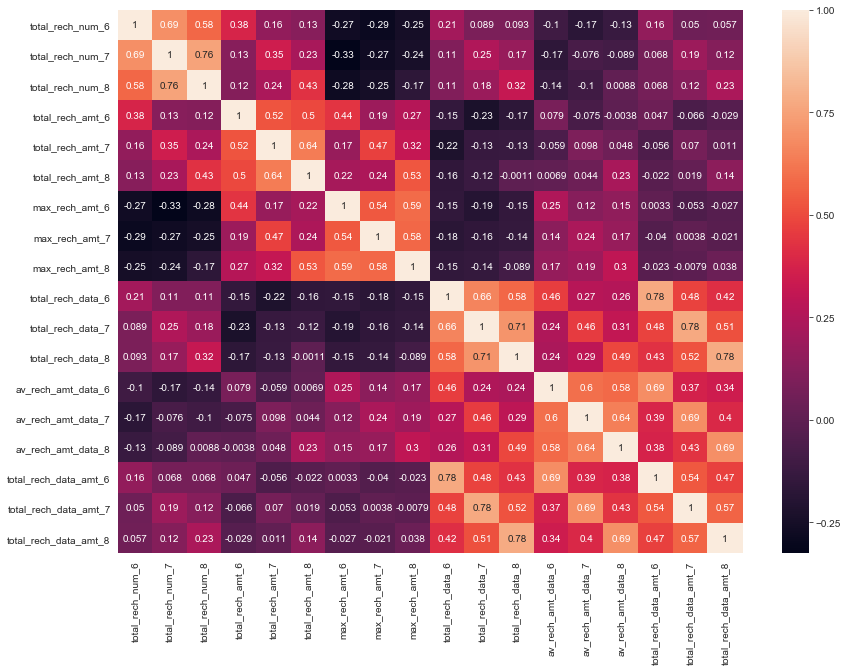

In [69]:
#plotting a heat map to view correlation
plt.figure(figsize=(14,10))
sns.heatmap(df[rech_features].corr(),annot=True)
plt.show()

<font color="blue">Data Interpretation of Correlation of Recharge Features 
- The correlations are certainly in the same fields across months
- No signficant correlations between other recharge features

### 2.7.4 Analyzing ONNET and OFFNET Features

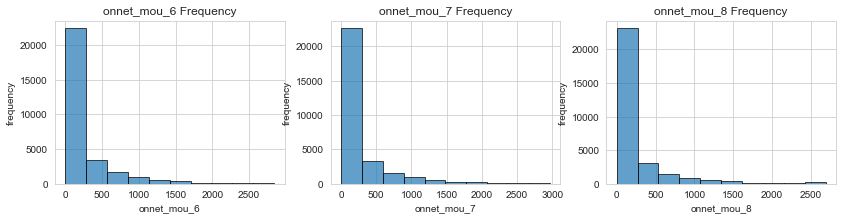

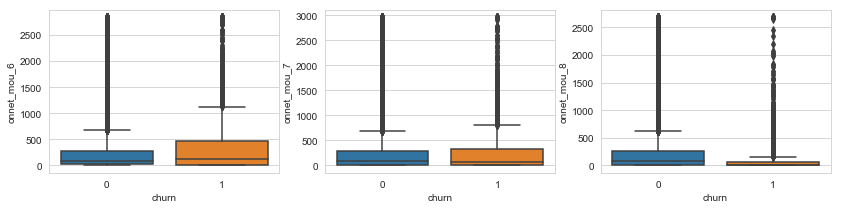

In [70]:
histogramNboxplot(df, 'onnet_mou')

<font color="blue">Data Interpretation for onnet 
- Decrease in Onnet minutes of usage in month 8 increases churn

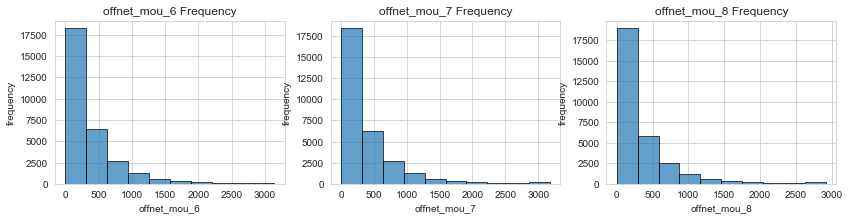

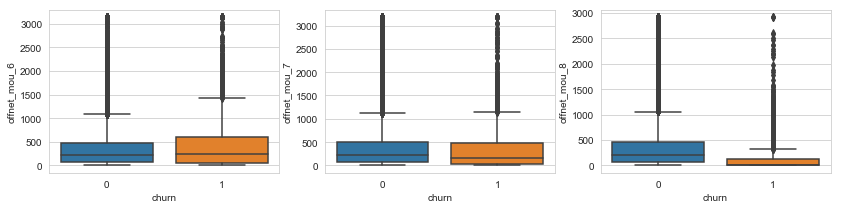

In [71]:
histogramNboxplot(df,'offnet_mou')

<font color="blue">Data Interpretation for offnet 
- Decrease in Offnet minutes of usage in month 8 increases churn

### 2.7.5 Analyzing Revenue Features

In [72]:
def num_univariate_anaysis_kde(col):
    fig = plt.figure(figsize=(14,5))
    sns.kdeplot(df.query('churn == 0')[col].dropna(), label="Not Churned", color="red")
    sns.kdeplot(df.query('churn == 1')[col].dropna(), label="Churned", color="green")
    plt.title(col + " Distribution based on Churn and Non-Churned")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

In [73]:
#Generic reusable function for plots
def dist_continuous_numeric_univariate_analysis(col):
    # Cut the window in 2 parts
    f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16, 5), sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    f.suptitle("Continuous Numeric Variable - " + col + " Distribution", size=14, y=1.01) 
    # Add a graph in each part
    sns.boxplot(df.query('churn == 0')[col].dropna(), color="lightgreen", ax=ax1)
    sns.distplot(df.query('churn == 0')[col].dropna(), color="green", ax=ax3)
    ax1.title.set_text(col + " for Non-Churned")
    ax3.set(xlabel=col)
    ax3.set(ylabel='Density')
    # Remove x axis name for the boxplot
    ax1.set(xlabel='')

    # Add a graph in each part
    sns.boxplot(df.query('churn == 1')[col].dropna(), color="lightsalmon", ax=ax2)
    sns.distplot(df.query('churn == 1')[col].dropna(), color="red", ax=ax4)
    ax2.title.set_text(col + " for Churned")
    ax4.set(xlabel=col)
    ax4.set(ylabel='Density')
    # Remove x axis name for the boxplot
    ax2.set(xlabel='')
    plt.tight_layout()
    plt.show()

In [74]:
# Plotting BINS
def plot_bar(ser_C0, ser_C1, label):
    f,ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
    f.suptitle("Ordered Categorical Variable (BINS) - " + label + " Distribution", size=14, y=1.01)
    sns.barplot(x=ser_C0.index, y=ser_C0.values, color="green", ax=ax[0])
    ax[0].title.set_text(label + " Bins for Non-Churned")
    ax[0].set(xlabel=label + " Bins")
    ax[0].tick_params(axis='x', labelrotation=45)
    ax[0].set(ylabel='Frequency')
    for i in ax[0].patches:
        if (i.get_height() != 0):
            ax[0].text(i.get_x()+0.20, i.get_y() + i.get_height()+0.15, str(int(i.get_height())) + "%", fontsize=12, color='black')


    sns.barplot(x=ser_C1.index, y=ser_C1.values, color="red", ax=ax[1])
    ax[1].title.set_text(label + " Bins for Churned")
    ax[1].set(xlabel=label + " Bins")
    ax[1].tick_params(axis='x', labelrotation=45)
    ax[1].set(ylabel='Frequency')
    for i in ax[1].patches:
        if (i.get_height() != 0):
            ax[1].text(i.get_x()+0.20, i.get_y() + i.get_height()+0.15, str(int(i.get_height())) + "%", fontsize=12, color='black')

    plt.show()

# Function to Create Bins and Plot
def plot_bins_univariate_analysis(col):
    # Create bins on the main dataframe so that the BINS for both Churned and Non-Churned are same.
    bins_main = pd.cut(df[col], 10, precision = 0).value_counts().sort_index().index
    bins_lst = []
    for i in bins_main.tolist():
        bins_lst.append((i.left, i.right))
    bins = pd.IntervalIndex.from_tuples(bins_lst)
    
    # Target = 0 Bins
    bins_C0 = pd.cut(df.query('churn == 0')[col].dropna(), bins, 10, precision=0)
    bins_C0 = np.round((bins_C0.value_counts().sort_index()/len(bins_C0.dropna()))*100,2)

    # Target = 1 Bins
    bins_C1 = pd.cut(df.query('churn == 1')[col].dropna(), bins, 10, precision=0)
    bins_C1 = np.round((bins_C1.value_counts().sort_index()/len(bins_C1.dropna()))*100,2)
    
    plot_bar(bins_C0, bins_C1, col)

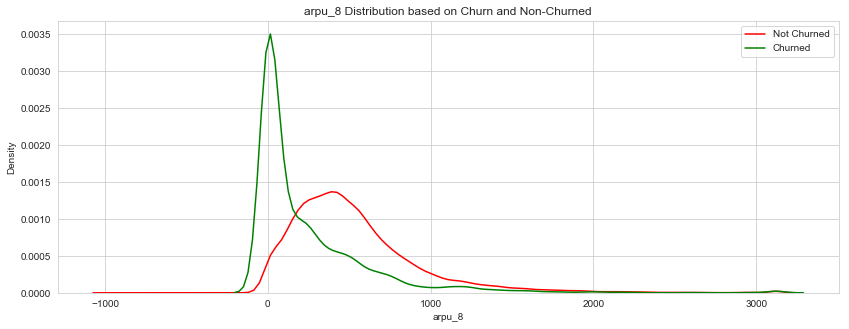

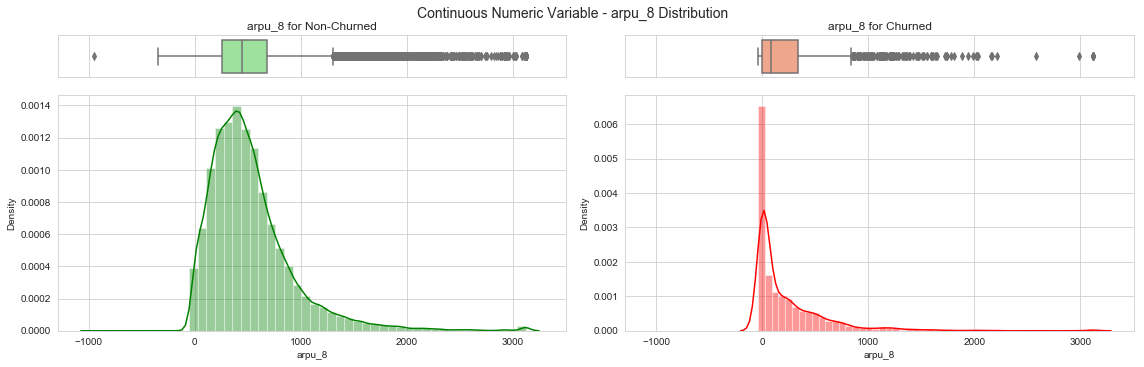

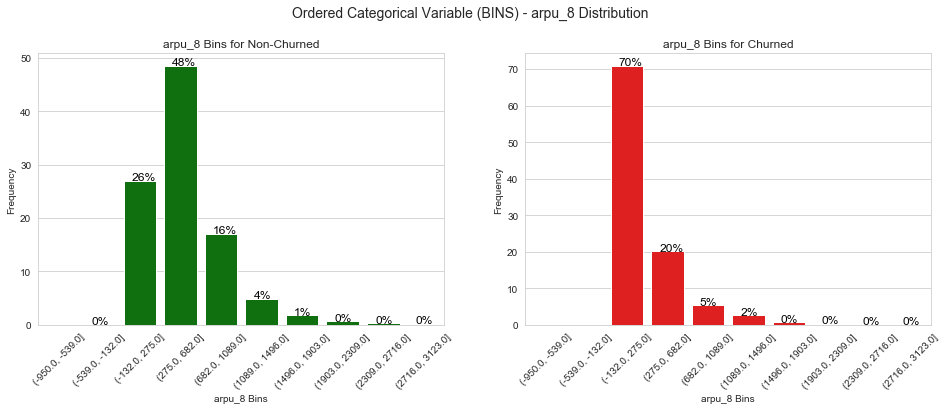

In [75]:
num_univariate_anaysis_kde("arpu_8")
dist_continuous_numeric_univariate_analysis("arpu_8")
plot_bins_univariate_analysis("arpu_8")

<font color="blue">Data Interpretation for arpu 
 - Decrease in Average Revenue Per user in month 8 leads to churn.
 - There is a clear decrease to close to 0 value where Churn is significant.

### 2.7.6 Analyzing Age of Network Feature

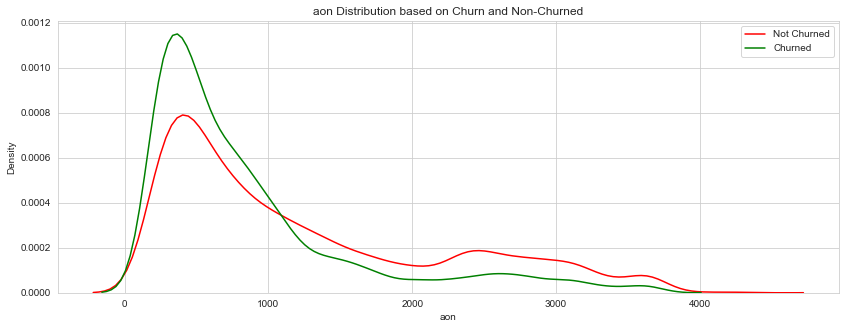

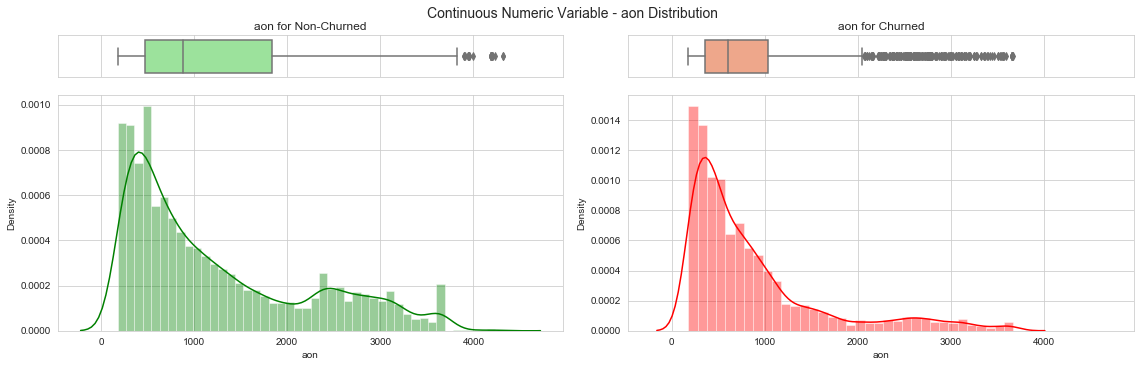

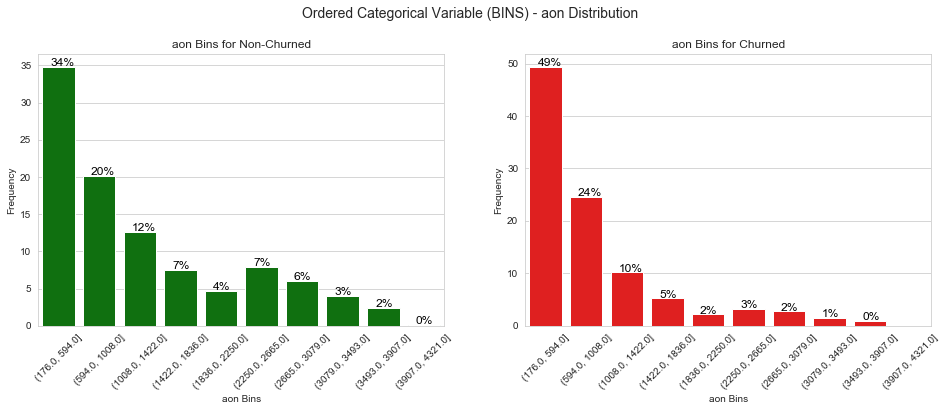

In [76]:
num_univariate_anaysis_kde("aon")
dist_continuous_numeric_univariate_analysis("aon")
plot_bins_univariate_analysis("aon")

<font color="blue">Data Interpretation for aon 
 - Churn cases more significant in cases Age on Network is lower.

### 2.7.7 Correlations of Overall Features (Month-wise Derivation)

In [77]:
lst_8=[]
lst_7=[]
lst_6=[]
for i in df.columns:
    if i.endswith('_8'):
        lst_8.append(i)
    elif i.endswith('_7'):
        lst_7.append(i)
    elif i.endswith('_6'):
        lst_6.append(i)

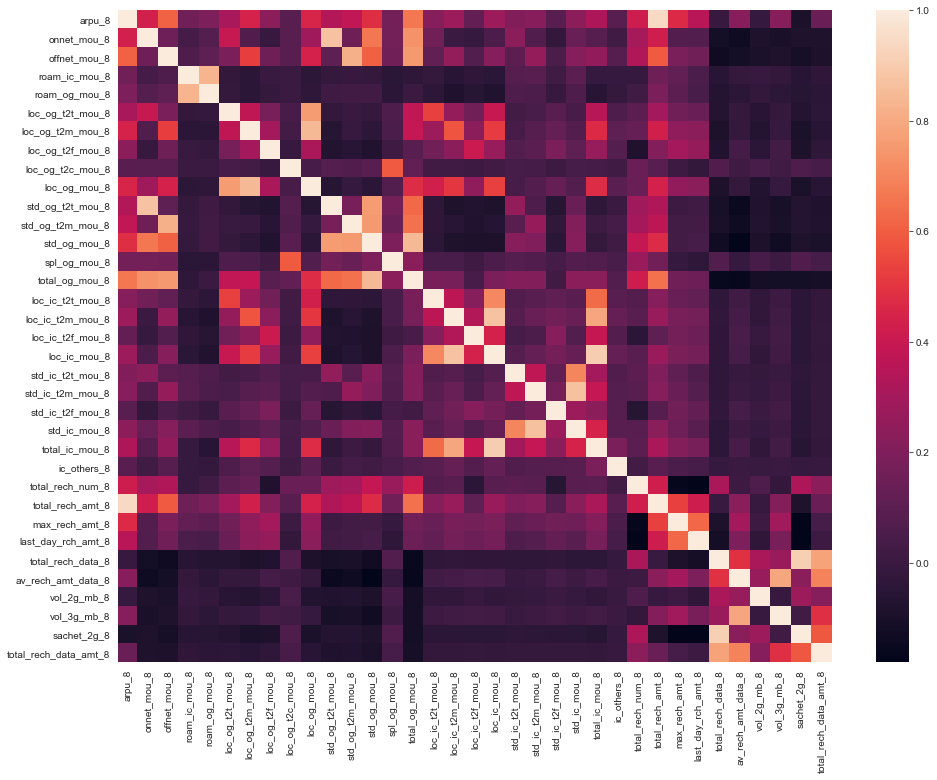

In [78]:
#plotting a heat map to view correlation
plt.figure(figsize=(16,12))
sns.heatmap(df[lst_8].corr(),annot=False)
plt.show()

#### Fetching top 10 correlations for month 8

In [79]:
topcorr(df,lst_8)

TOP 10 HIGH POSITIVE CORRELATION % 

              Feature_1              Feature_2  Correlation
26               arpu_8       total_rech_amt_8         94.0
1048  total_rech_data_8            sachet_2g_8         91.0
653        loc_ic_mou_8         total_ic_mou_8         90.0
45          onnet_mou_8       std_og_t2t_mou_8         87.0
219    loc_og_t2m_mou_8           loc_og_mou_8         85.0
109       roam_ic_mou_8          roam_og_mou_8         83.0
81         offnet_mou_8       std_og_t2m_mou_8         82.0
583    loc_ic_t2m_mou_8         total_ic_mou_8         79.0
1049  total_rech_data_8  total_rech_data_amt_8         78.0
184    loc_og_t2t_mou_8           loc_og_mou_8         76.0

TOP 10 HIGH NEGATIVE CORRELATION % 

            Feature_1           Feature_2  Correlation
450      std_og_mou_8  av_rech_amt_data_8        -18.0
902  total_rech_num_8      max_rech_amt_8        -17.0
520    total_og_mou_8  av_rech_amt_data_8        -16.0
380  std_og_t2t_mou_8  av_rech_amt_data_8    

#### Fetching top 10 correlations for month 7

In [80]:
topcorr(df,lst_7)

TOP 10 HIGH POSITIVE CORRELATION % 

              Feature_1              Feature_2  Correlation
26               arpu_7       total_rech_amt_7         93.0
1048  total_rech_data_7            sachet_2g_7         91.0
653        loc_ic_mou_7         total_ic_mou_7         90.0
45          onnet_mou_7       std_og_t2t_mou_7         87.0
578    loc_ic_t2m_mou_7           loc_ic_mou_7         86.0
434        std_og_mou_7         total_og_mou_7         85.0
81         offnet_mou_7       std_og_t2m_mou_7         84.0
219    loc_og_t2m_mou_7           loc_og_mou_7         83.0
1049  total_rech_data_7  total_rech_data_amt_7         78.0
583    loc_ic_t2m_mou_7         total_ic_mou_7         77.0

TOP 10 HIGH NEGATIVE CORRELATION % 

            Feature_1           Feature_2  Correlation
520    total_og_mou_7  av_rech_amt_data_7        -28.0
902  total_rech_num_7      max_rech_amt_7        -27.0
450      std_og_mou_7  av_rech_amt_data_7        -26.0
519    total_og_mou_7   total_rech_data_7    

#### Fetching top 10 correlations for month 6

In [81]:
topcorr(df,lst_6)

TOP 10 HIGH POSITIVE CORRELATION % 

              Feature_1         Feature_2  Correlation
26               arpu_6  total_rech_amt_6         93.0
1048  total_rech_data_6       sachet_2g_6         91.0
653        loc_ic_mou_6    total_ic_mou_6         90.0
578    loc_ic_t2m_mou_6      loc_ic_mou_6         88.0
722    std_ic_t2m_mou_6      std_ic_mou_6         87.0
45          onnet_mou_6  std_og_t2t_mou_6         86.0
219    loc_og_t2m_mou_6      loc_og_mou_6         84.0
434        std_og_mou_6    total_og_mou_6         83.0
81         offnet_mou_6  std_og_t2m_mou_6         82.0
583    loc_ic_t2m_mou_6    total_ic_mou_6         79.0

TOP 10 HIGH NEGATIVE CORRELATION % 

            Feature_1           Feature_2  Correlation
520    total_og_mou_6  av_rech_amt_data_6        -27.0
450      std_og_mou_6  av_rech_amt_data_6        -26.0
903  total_rech_num_6  last_day_rch_amt_6        -25.0
978    max_rech_amt_6         sachet_2g_6        -23.0
99       offnet_mou_6   total_rech_data_6    

<font color="blue">Data Interpretation of Correlation of Features for Month 6,7 and 8 

The following features are highly correlated (common amongst 3 months)
1. arpu and total_rech_amt
- loc_ic_mou and total_ic_mou
- loc_ic_t2m_mou and loc_ic_mou
- roam_ic_mou and roam_og_mou
- onnet_mou and std_og_t2t
- std_og_mou and total_og
- loc_ic_t2m and total_ic_mou
- offnet_mou and std_og_t2m_mou
- av_rech_amt_data and vol_3g_mb

There are no significant negatively correlated features

## Derive Features

Create a single feature set for the Good Phase. 

The features of months 6 and 7 will be averaged to form this and then the features of months 6 and 7 will be dropped.

In [82]:
features_6_7=[]
for i in df.columns:
    if (i.endswith('_6')) or (i.endswith('_7')) or (i.endswith('_8')):
        features_6_7.append(i[0:i.rfind("_")])
features_6_7 = list(set(features_6_7))
features_6_7

['arpu',
 'sachet_2g',
 'std_ic_t2f_mou',
 'last_day_rch_amt',
 'loc_ic_t2m_mou',
 'loc_og_t2f_mou',
 'total_rech_amt',
 'loc_og_t2t_mou',
 'ic_others',
 'av_rech_amt_data',
 'loc_ic_mou',
 'loc_ic_t2f_mou',
 'roam_ic_mou',
 'offnet_mou',
 'total_rech_num',
 'vol_2g_mb',
 'vol_3g_mb',
 'total_ic_mou',
 'std_ic_t2m_mou',
 'loc_og_t2m_mou',
 'loc_og_mou',
 'onnet_mou',
 'loc_og_t2c_mou',
 'total_rech_data',
 'total_rech_data_amt',
 'std_ic_mou',
 'max_rech_amt',
 'std_og_mou',
 'loc_ic_t2t_mou',
 'std_og_t2t_mou',
 'total_og_mou',
 'std_og_t2m_mou',
 'spl_og_mou',
 'roam_og_mou',
 'std_ic_t2t_mou']

In [83]:
for i in features_6_7:
    df[i + "_GoodPhase"] = (df[i + "_6"] + df[i + "_7"])/2
    df.drop([i + '_6',i + '_7'], axis=1, inplace=True)
df.head()

mobile_number     arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
0      7000842753   213.8030         0.00          0.00           0.00   
7      7000701601  3123.2225        52.29        325.91          31.64   
8      7001524846   137.3620        35.08        136.48           0.00   
21     7002124215   637.7600        85.14        983.39           0.00   
23     7000887461   366.9660        33.58        205.89           0.00   

    roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
0            0.00              0.00              0.00              0.00   
7           38.06             40.28            162.28             53.23   
8            0.00             12.49             50.54              0.00   
21           0.00             23.34            104.81              1.58   
23           0.00             33.58            148.56              0.00   

    loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  \
0               0.00          0.00              0.00              0.00   
7               0.00        255.79             12.01             49.14   
8               7.15         63.04             22.58             75.69   
21              0.00        129.74             61.79            876.99   
23             17.71        182.14              0.00             39.61   

    std_og_mou_8  spl_og_mou_8  total_og_mou_8  loc_ic_t2t_mou_8  \
0           0.00          0.00            0.00              0.16   
7          77.84          6.50          350.16             27.31   
8          98.28         10.23          171.56              0.31   
21        938.79          0.00         1068.54             19.54   
23         39.61         17.71          239.48             76.64   

    loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  \
0               4.13              1.15          5.44              0.00   
7             121.19             39.53        188.04             30.39   
8              15.48              0.00         15.79              0.10   
21            129.16             10.39        159.11              0.18   
23            146.84              0.71        224.21             13.38   

    std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  total_ic_mou_8  \
0               0.00              0.00          0.00            5.44   
7             141.33             22.21        193.94          428.74   
8               0.65              0.00          0.75           16.54   
21            101.74              0.00        101.93          261.04   
23             43.91              0.00         57.29          298.33   

    ic_others_8  total_rech_num_8  total_rech_amt_8  max_rech_amt_8  \
0         0.000               2.0               252             252   
7         9.325               7.0              3638            1100   
8         0.000              14.0               120              30   
21        0.000              27.0               718              50   
23        9.325               4.0               439             179   

    last_day_rch_amt_8  total_rech_data_8  av_rech_amt_data_8  vol_2g_mb_8  \
0                  252                1.0               252.0         5.75   
7                  630                0.0                 0.0         0.00   
8                   10                3.0                69.0         0.03   
21                  50                0.0                 0.0         0.00   
23                   0                2.0               270.0         0.01   

    vol_3g_mb_8  sachet_2g_8  aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn  \
0        109.61            0  968       30.40        0.00      101.20      1   
7          0.00            0  802       57.74       19.38       18.74      1   
8         11.94            3  315       21.03      910.65      122.16      0   
21         0.00            0  720        0.00        0.00        0.00      0   
23      1009.92            0  604       40.45       51.86        0.00      0   


In [84]:
df.head()

mobile_number     arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
0      7000842753   213.8030         0.00          0.00           0.00   
7      7000701601  3123.2225        52.29        325.91          31.64   
8      7001524846   137.3620        35.08        136.48           0.00   
21     7002124215   637.7600        85.14        983.39           0.00   
23     7000887461   366.9660        33.58        205.89           0.00   

    roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
0            0.00              0.00              0.00              0.00   
7           38.06             40.28            162.28             53.23   
8            0.00             12.49             50.54              0.00   
21           0.00             23.34            104.81              1.58   
23           0.00             33.58            148.56              0.00   

    loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  \
0               0.00          0.00              0.00              0.00   
7               0.00        255.79             12.01             49.14   
8               7.15         63.04             22.58             75.69   
21              0.00        129.74             61.79            876.99   
23             17.71        182.14              0.00             39.61   

    std_og_mou_8  spl_og_mou_8  total_og_mou_8  loc_ic_t2t_mou_8  \
0           0.00          0.00            0.00              0.16   
7          77.84          6.50          350.16             27.31   
8          98.28         10.23          171.56              0.31   
21        938.79          0.00         1068.54             19.54   
23         39.61         17.71          239.48             76.64   

    loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  \
0               4.13              1.15          5.44              0.00   
7             121.19             39.53        188.04             30.39   
8              15.48              0.00         15.79              0.10   
21            129.16             10.39        159.11              0.18   
23            146.84              0.71        224.21             13.38   

    std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  total_ic_mou_8  \
0               0.00              0.00          0.00            5.44   
7             141.33             22.21        193.94          428.74   
8               0.65              0.00          0.75           16.54   
21            101.74              0.00        101.93          261.04   
23             43.91              0.00         57.29          298.33   

    ic_others_8  total_rech_num_8  total_rech_amt_8  max_rech_amt_8  \
0         0.000               2.0               252             252   
7         9.325               7.0              3638            1100   
8         0.000              14.0               120              30   
21        0.000              27.0               718              50   
23        9.325               4.0               439             179   

    last_day_rch_amt_8  total_rech_data_8  av_rech_amt_data_8  vol_2g_mb_8  \
0                  252                1.0               252.0         5.75   
7                  630                0.0                 0.0         0.00   
8                   10                3.0                69.0         0.03   
21                  50                0.0                 0.0         0.00   
23                   0                2.0               270.0         0.01   

    vol_3g_mb_8  sachet_2g_8  aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn  \
0        109.61            0  968       30.40        0.00      101.20      1   
7          0.00            0  802       57.74       19.38       18.74      1   
8         11.94            3  315       21.03      910.65      122.16      0   
21         0.00            0  720        0.00        0.00        0.00      0   
23      1009.92            0  604       40.45       51.86        0.00      0   


In [85]:
for i in features_6_7:
    df.rename(columns={(i + '_8'): i + '_ActionPhase'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 76 columns):
mobile_number                      30001 non-null int64
arpu_ActionPhase                   30001 non-null float64
onnet_mou_ActionPhase              30001 non-null float64
offnet_mou_ActionPhase             30001 non-null float64
roam_ic_mou_ActionPhase            30001 non-null float64
roam_og_mou_ActionPhase            30001 non-null float64
loc_og_t2t_mou_ActionPhase         30001 non-null float64
loc_og_t2m_mou_ActionPhase         30001 non-null float64
loc_og_t2f_mou_ActionPhase         30001 non-null float64
loc_og_t2c_mou_ActionPhase         30001 non-null float64
loc_og_mou_ActionPhase             30001 non-null float64
std_og_t2t_mou_ActionPhase         30001 non-null float64
std_og_t2m_mou_ActionPhase         30001 non-null float64
std_og_mou_ActionPhase             30001 non-null float64
spl_og_mou_ActionPhase             30001 non-null float64
total_og_mou_ActionPhas

In [86]:
df.reset_index(drop=True, inplace=True)

In [87]:
df.head()

mobile_number  arpu_ActionPhase  onnet_mou_ActionPhase  \
0     7000842753          213.8030                   0.00   
1     7000701601         3123.2225                  52.29   
2     7001524846          137.3620                  35.08   
3     7002124215          637.7600                  85.14   
4     7000887461          366.9660                  33.58   

   offnet_mou_ActionPhase  roam_ic_mou_ActionPhase  roam_og_mou_ActionPhase  \
0                    0.00                     0.00                     0.00   
1                  325.91                    31.64                    38.06   
2                  136.48                     0.00                     0.00   
3                  983.39                     0.00                     0.00   
4                  205.89                     0.00                     0.00   

   loc_og_t2t_mou_ActionPhase  loc_og_t2m_mou_ActionPhase  \
0                        0.00                        0.00   
1                       40.28                      162.28   
2                       12.49                       50.54   
3                       23.34                      104.81   
4                       33.58                      148.56   

   loc_og_t2f_mou_ActionPhase  loc_og_t2c_mou_ActionPhase  \
0                        0.00                        0.00   
1                       53.23                        0.00   
2                        0.00                        7.15   
3                        1.58                        0.00   
4                        0.00                       17.71   

   loc_og_mou_ActionPhase  std_og_t2t_mou_ActionPhase  \
0                    0.00                        0.00   
1                  255.79                       12.01   
2                   63.04                       22.58   
3                  129.74                       61.79   
4                  182.14                        0.00   

   std_og_t2m_mou_ActionPhase  std_og_mou_ActionPhase  spl_og_mou_ActionPhase  \
0                        0.00                    0.00                    0.00   
1                       49.14                   77.84                    6.50   
2                       75.69                   98.28                   10.23   
3                      876.99                  938.79                    0.00   
4                       39.61                   39.61                   17.71   

   total_og_mou_ActionPhase  loc_ic_t2t_mou_ActionPhase  \
0                      0.00                        0.16   
1                    350.16                       27.31   
2                    171.56                        0.31   
3                   1068.54                       19.54   
4                    239.48                       76.64   

   loc_ic_t2m_mou_ActionPhase  loc_ic_t2f_mou_ActionPhase  \
0                        4.13                        1.15   
1                      121.19                       39.53   
2                       15.48                        0.00   
3                      129.16                       10.39   
4                      146.84                        0.71   

   loc_ic_mou_ActionPhase  std_ic_t2t_mou_ActionPhase  \
0                    5.44                        0.00   
1                  188.04                       30.39   
2                   15.79                        0.10   
3                  159.11                        0.18   
4                  224.21                       13.38   

   std_ic_t2m_mou_ActionPhase  std_ic_t2f_mou_ActionPhase  \
0                        0.00                        0.00   
1                      141.33                       22.21   
2                        0.65                        0.00   
3                      101.74                        0.00   
4                       43.91                        0.00   

   std_ic_mou_ActionPhase  total_ic_mou_ActionPhase  ic_others_ActionPhase  \
0                    0.00                      5.44                  0.000   
1        

<a id="FEDP"></a>
# 3. Feature Engineering - Data Preparation

In [88]:
# Renaming dataframe for better organization and taking a copy
df_churn = df.copy()

There are no Ordered Categorical Variables for conversion

In [89]:
#selecting numerical variables
numerical_features = list(df_churn.select_dtypes(include=['int64','float64']).columns)
numerical_features = list(set(numerical_features) - set(['mobile_number']))
numerical_features

['roam_ic_mou_ActionPhase',
 'ic_others_GoodPhase',
 'av_rech_amt_data_GoodPhase',
 'std_og_t2m_mou_ActionPhase',
 'vol_2g_mb_ActionPhase',
 'loc_og_t2f_mou_ActionPhase',
 'loc_og_t2f_mou_GoodPhase',
 'jun_vbc_3g',
 'vol_2g_mb_GoodPhase',
 'onnet_mou_ActionPhase',
 'roam_og_mou_GoodPhase',
 'loc_ic_t2t_mou_ActionPhase',
 'av_rech_amt_data_ActionPhase',
 'std_ic_t2f_mou_GoodPhase',
 'last_day_rch_amt_GoodPhase',
 'total_rech_num_ActionPhase',
 'std_ic_t2m_mou_ActionPhase',
 'aon',
 'std_og_t2m_mou_GoodPhase',
 'std_ic_t2f_mou_ActionPhase',
 'total_rech_data_GoodPhase',
 'loc_og_t2c_mou_ActionPhase',
 'arpu_GoodPhase',
 'std_og_t2t_mou_GoodPhase',
 'total_rech_amt_GoodPhase',
 'loc_og_t2m_mou_ActionPhase',
 'sachet_2g_GoodPhase',
 'loc_og_t2t_mou_GoodPhase',
 'std_ic_mou_GoodPhase',
 'loc_og_mou_ActionPhase',
 'total_rech_data_ActionPhase',
 'loc_og_t2c_mou_GoodPhase',
 'std_ic_t2m_mou_GoodPhase',
 'std_ic_mou_ActionPhase',
 'loc_og_t2m_mou_GoodPhase',
 'std_og_t2t_mou_ActionPhase',
 'lo

<a id="PCA"></a>
# 4. Principal Component Analysis

<a id="S"></a>
### 4.1 Scaling

In [90]:
scaler = StandardScaler()
df_churn_scaled = pd.DataFrame(scaler.fit_transform(df_churn[numerical_features]))
df_churn_scaled.columns = numerical_features
df_churn_scaled.head()

roam_ic_mou_ActionPhase  ic_others_GoodPhase  av_rech_amt_data_GoodPhase  \
0                -0.291212            -0.370909                    0.717527   
1                 0.920371             5.979387                   -0.805415   
2                -0.291212            -0.370909                   -0.270573   
3                -0.291212            -0.370909                   -0.805415   
4                -0.291212             1.327796                    0.270313   

   std_og_t2m_mou_ActionPhase  vol_2g_mb_ActionPhase  \
0                   -0.444307              -0.373778   
1                   -0.298154              -0.396876   
2                   -0.219188              -0.396755   
3                    2.164054              -0.396876   
4                   -0.326498              -0.396836   

   loc_og_t2f_mou_ActionPhase  loc_og_t2f_mou_GoodPhase  jun_vbc_3g  \
0                   -0.421001                 -0.449965   -0.140774   
1                    3.925277                  4.287923   -0.370802   
2                   -0.421001                 -0.449965   -0.082304   
3                   -0.291993                 -0.419664   -0.423079   
4                   -0.421001                 -0.449965   -0.423079   

   vol_2g_mb_GoodPhase  onnet_mou_ActionPhase  roam_og_mou_GoodPhase  \
0            -0.410621              -0.555784              -0.351049   
1            -0.472668              -0.428723               0.018742   
2             0.229683              -0.470542              -0.351049   
3            -0.472668              -0.348900              -0.351049   
4            -0.471722              -0.474187              -0.351049   

   loc_ic_t2t_mou_ActionPhase  av_rech_amt_data_ActionPhase  \
0                   -0.606523                      0.719374   
1                   -0.309111                     -0.660197   
2                   -0.604880                     -0.282458   
3                   -0.394227                     -0.660197   
4                    0.231270                      0.817914   

   std_ic_t2f_mou_GoodPhase  last_day_rch_amt_GoodPhase  \
0                 -0.363726                    1.714457   
1                  5.798176                   -1.062087   
2                 -0.363726                   -0.786636   
3                 -0.363726                   -0.786636   
4                 -0.363726                   -0.075973   

   total_rech_num_ActionPhase  std_ic_t2m_mou_ActionPhase       aon  \
0                   -0.880774                   -0.471660 -0.252040   
1                   -0.326467                    2.426262 -0.425378   
2                    0.449563                   -0.458332 -0.933909   
3                    1.890763                    1.614483 -0.511004   
4                   -0.659051                    0.428700 -0.632132   

   std_og_t2m_mou_GoodPhase  std_ic_t2f_mou_ActionPhase  \
0                 -0.503340                   -0.322700   
1                 -0.388020                    4.326756   
2                 -0.469824                   -0.322700   
3                  1.578627                   -0.322700   
4                 -0.491038                   -0.322700   

   total_rech_data_GoodPhase  loc_og_t2c_mou_ActionPhase  arpu_GoodPhase  \
0                  -0.291458                   -0.350057       -1.013831   
1                  -0.685161                   -0.350057        1.905041   
2                  -0.291458                    1.405852       -0.346603   
3                  -0.685161                   -0.350057        0.004305   
4                  -0.291458                    3.999195       -1.223207   

   std_og_t2t_mou_GoodPhase  total_rech_amt_GoodPhase  \
0                 -0.468297                 -0.852471   
1                 -0.429357                  1.301195   
2                 -0.115464                 -0.332451   
3                 -0.152330                 -0.035648   
4                 -0.468297                 -1.048704   

   loc_og_t2m_m

<a id="APCA"></a>
### 4.2 Applying PCA

In [91]:
pca = PCA(svd_solver='randomized', random_state=42)
# Performing PCA on the scaled dataset
pca.fit(df_churn_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [92]:
# Checking the components
pd.DataFrame(pca.components_).head()

0         1         2         3         4         5         6   \
0  0.031679  0.043807 -0.070699  0.100375 -0.053165  0.099499  0.098548   
1  0.022373 -0.020501 -0.171055  0.175162 -0.044102 -0.110014 -0.114239   
2  0.042963 -0.002742  0.253680  0.095030  0.081222 -0.023243 -0.032439   
3 -0.123506  0.005156 -0.045290  0.010325  0.099817 -0.076356 -0.083090   
4  0.062694  0.056607 -0.055874  0.013891  0.046956 -0.014812 -0.013921   

         7         8         9         10        11        12        13  \
0 -0.017771 -0.072370  0.132924  0.036437  0.135271 -0.039965  0.063481   
1 -0.129796 -0.048571  0.152758  0.052110 -0.121438 -0.157611 -0.081532   
2  0.194428  0.064241  0.065768  0.043715 -0.060719  0.278949 -0.003328   
3 -0.103118  0.089765  0.063558 -0.121539  0.111779 -0.005508 -0.074283   
4 -0.062721  0.048526 -0.080258  0.039553  0.019788 -0.055481  0.125675   

         14        15        16        17        18        19        20  \
0  0.090918  0.064338  0.099105  0.055251  0.086689  0.058611 -0.121655   
1 -0.073409  0.095077  0.013215 -0.092840  0.190058 -0.074690 -0.081399   
2  0.041979  0.124862  0.084086 -0.057800  0.062350  0.004249  0.176186   
3 -0.218167  0.256024 -0.078114 -0.061832 -0.006289 -0.060682  0.242888   
4 -0.091324  0.025084  0.319022 -0.033249  0.016006  0.119918  0.070529   

         21        22        23        24        25        26        27  \
0  0.023175  0.199909  0.067357  0.201292  0.179764 -0.110685  0.140568   
1  0.025036  0.042714  0.210587  0.045724 -0.109604 -0.034870 -0.072948   
2  0.047523  0.143608  0.056469  0.138219 -0.046155  0.102651 -0.069032   
3  0.076773 -0.043935  0.007498 -0.051192  0.073193  0.271705  0.102241   
4  0.013844 -0.092992 -0.025854 -0.099381 -0.094094  0.096443 -0.112388   

         28        29        30        31        32        33        34  \
0  0.102197  0.197214 -0.088046  0.014690  0.092717  0.108598  0.173594   
1  0.019194 -0.109353 -0.076962  0.027905  0.017145  0.015230 -0.109735   
2  0.076968 -0.052274  0.204898  0.037353  0.065265  0.097254 -0.076837   
3 -0.104994  0.103546  0.253083  0.075979 -0.090058 -0.091996  0.066526   
4  0.372673 -0.128500  0.063582  0.018828  0.330826  0.362595 -0.098033   

         35        36        37        38        39        40        41  \
0  0.081531  0.086957 -0.017709 -0.085168  0.178278  0.199668 -0.056350   
1  0.197610 -0.130600 -0.135075 -0.033630 -0.155296  0.017972 -0.092054   
2  0.086991 -0.048942  0.207833  0.128995 -0.061641  0.189862  0.255618   
3  0.026260  0.002432 -0.104683  0.278177  0.065279 -0.006127  0.156740   
4 -0.030032  0.035131 -0.067035  0.091422  0.180299 -0.092057  0.003145   

         42        43        44        45        46        47        48  \
0  0.156826  0.127790  0.171863  0.079088  0.092130  0.184278  0.049341   
1 -0.161663 -0.119575 -0.179766  0.043718 -0.079437 -0.154463  0.110497   
2 -0.063531 -0.079816 -0.077059  0.069997  0.066277 -0.033452  0.074905   
3  0.101287  0.106755  0.123341 -0.078384 -0.161867  0.075803  0.242806   
4  0.052259  0.022033  0.055593  0.271236 -0.094086  0.175472  0.028150   

         49        50        51        52        53        54        55  \
0  0.045495  0.103691 -0.037912  0.091612  0.150085  0.084993  0.174639   
1  0.049806  0.263027 -0.143742 -0.105088 -0.073966  0.035494  0.107129   
2  0.062244  0.081715  0.255501  0.074079 -0.047084  0.084146  0.023426   
3  0.116018  0.001058 -0.096253 -0.241654  0.105701 -0.065795  0.013172   
4  0.019900 -0.008639 -0.091201 -0.087179 -0.113969  0.264379 -0.038039   

         56        57        58        59        60        61        62  \
0  0.031448  0.205707  0.119247  0.033967  0.166439  0.196817  0.189561   
1  0.056141  0.154815  0.240087  0.045036 -0.180862  0.179027 -0.109469   
2  0.043470  0.084007  0.122106  0.043942 -0.101322  0.032796 -0.083385   
3  0.107884  0.078727  0.025557 -0.116149  0.115717  0.057529  0.098340   
4  0.025005 -0.081901 -0.0

In [93]:
# Find how much variance is explained by the principal components
pd.DataFrame(pca.explained_variance_ratio_).head(10)

0
0  0.163822
1  0.117545
2  0.079244
3  0.065363
4  0.056253
5  0.042083
6  0.037396
7  0.031472
8  0.029023
9  0.027245

In [94]:
#Printing cummulative explained variance
pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)).head(10)

0
0  0.163822
1  0.281367
2  0.360611
3  0.425974
4  0.482228
5  0.524310
6  0.561706
7  0.593178
8  0.622201
9  0.649446

 <a id="PPC"></a>
 ### 4.3 Plotting the principal components
- Plotting original features on the first 2 principal components as axes (just for visualization purchase)

In [95]:
#Checking how the original variables are loaded on the principal components on a 2D surface
colnames = list(df_churn_scaled.columns)
df_churn_pca_2comp = pd.DataFrame({'Feature':colnames,'PC1':pca.components_[0], 'PC2':pca.components_[1]})
df_churn_pca_2comp.head()

Feature       PC1       PC2
0     roam_ic_mou_ActionPhase  0.031679  0.022373
1         ic_others_GoodPhase  0.043807 -0.020501
2  av_rech_amt_data_GoodPhase -0.070699 -0.171055
3  std_og_t2m_mou_ActionPhase  0.100375  0.175162
4       vol_2g_mb_ActionPhase -0.053165 -0.044102

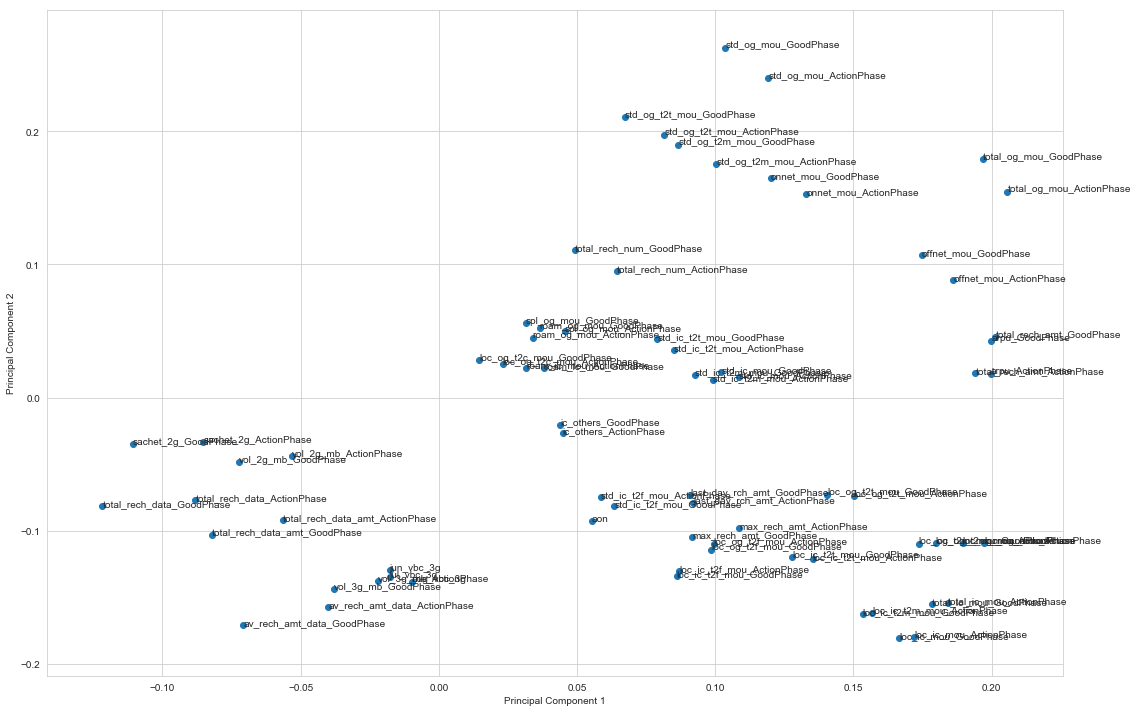

In [96]:
# Plotting PC1 and PC2 to visualise how these features are loaded
fig = plt.figure(figsize = (16,10))
plt.scatter(df_churn_pca_2comp.PC1, df_churn_pca_2comp.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(df_churn_pca_2comp.Feature):
    plt.annotate(txt, (df_churn_pca_2comp.PC1[i],df_churn_pca_2comp.PC2[i]))
plt.tight_layout()
plt.show()

<font color="blue">Data Interpretation of 2 Principal Components Plot 
- The first component is where the og features is heavy. They have the highest loading.

<a id="SP"></a>
### 4.4 Scree Plot

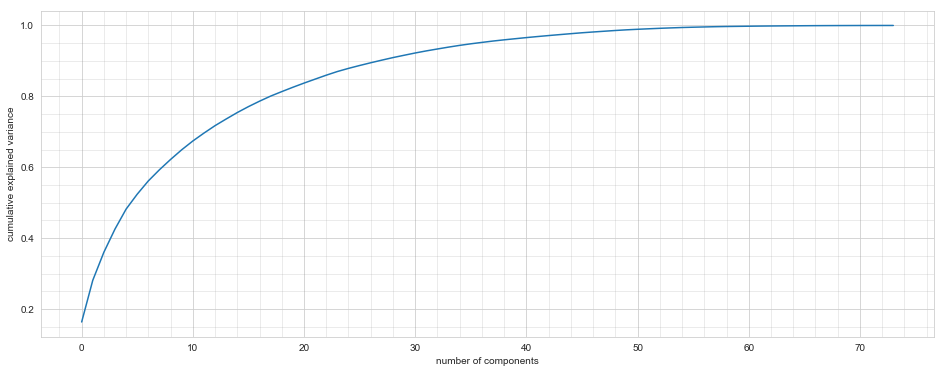

In [97]:
#Making the screeplot - plotting the cumulative variance against the number of components
fig = plt.figure(figsize = (16,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#888888', linestyle='-', alpha=0.2)
plt.show()

<font color="blue">Data Interpretation of Scree Plot 
- Around 65% variance is explained by 9 components
- Around 80% variance is explained by 17 components
- Around 95% variance is explained by 34 components

<font color="orange">**Choosing 34 principal components for our model** 

<a id="IPCA"></a>
### 4.4 Incremental PCA

In [98]:
#Using incremental PCA with 34 components
pca_final = IncrementalPCA(n_components=34)

#### Basis transformation 
- getting the data onto our PCs

In [99]:
df_churn_pca = pca_final.fit_transform(df_churn_scaled)
df_churn_pca.shape

(30001, 34)

In [100]:
pd.DataFrame(df_churn_pca).head()

0         1         2         3         4         5         6   \
0 -3.553313 -0.359261 -0.833162 -2.509668 -1.159040  0.060565 -0.344119   
1  8.588622 -4.046527  2.494160 -6.443236  2.483801 -1.639906  0.408439   
2 -2.700738  0.779598 -0.500083  0.901762 -0.690733  0.450954 -0.090495   
3  0.952397  3.595846 -0.124266  0.441052  1.092903 -2.683567 -1.437716   
4 -1.742347 -0.819174 -0.525532  0.018698  0.534678  0.139272 -1.032004   

         7         8         9         10        11        12        13  \
0  0.836732 -0.772648  0.388477 -0.863293  0.034372  1.004056 -0.460140   
1  8.422242  1.109832 -0.510242  0.762082  0.288301 -1.115210  6.766278   
2 -0.925972  0.517730  1.185147  0.443882 -0.215145 -0.836433 -0.216103   
3 -0.969531 -1.316127 -0.169828 -0.732696 -0.106118 -1.246665 -0.514672   
4 -0.209365  1.827808  0.848057 -2.419407 -0.822824 -0.361339  3.458987   

         14        15        16        17        18        19        20  \
0 -1.121671  0.563572  0.149456 -0.090164  0.097943 -0.121306  0.692201   
1 -3.583457  1.085659  4.640775 -2.536050  2.983065 -0.575716  0.705587   
2  0.355560 -0.264312  0.495322  0.267673 -0.134358  0.036138 -0.743637   
3  0.459190 -0.624612  1.064293 -0.327709  0.493140 -0.588670  0.161345   
4 -2.800368 -0.594651 -0.603554  1.296020 -0.639664  0.072679  0.072214   

         21        22        23        24        25        26        27  \
0 -0.154404 -0.300036  0.236286 -0.131839 -0.179857  0.053244 -0.238210   
1 -0.953845 -1.133080  2.266742  2.558968  0.504012 -1.588543  1.228380   
2  0.728493 -1.356220  1.218178 -0.329664 -0.410518 -0.351440  0.675569   
3  0.237407  0.049768  0.103065 -0.165018 -0.441901  0.111774  0.317794   
4  1.314432 -2.480984 -0.948808  0.160051 -0.304966  1.838559  2.169658   

         28        29        30        31        32        33  
0 -0.098237 -0.066191 -0.494947  1.022450 -0.102252  0.086905  
1 -0.001264  0.488851  0.206877 -3.803278  0.521735  0.726882  
2  0.176139  0.411694 -0.535289  0.200944  0.185004  0.102484  
3  0.377840  0.301762 -0.332054  0.453844  0.391337  0.205434  
4 -0.629104  0.333844  0.312578 -0.104473  0.182977  0.321773

<a id="CMPC"></a>
#### 4.4.1 Creating correlation matrix for the principal components

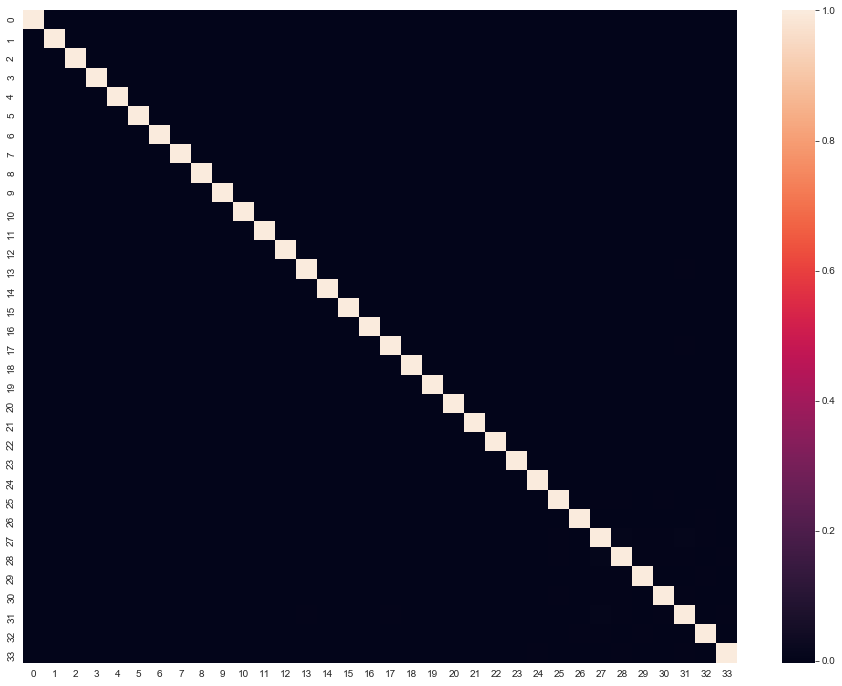

In [101]:
#creating correlation matrix for the principal components
plt.figure(figsize=(16,12))
sns.heatmap(pd.DataFrame(df_churn_pca).corr(),annot = False)

<font color="blue">Data Interpretation of correlation Matrix for PC 
- There is no correlation between these three components. They are orthogonal.
- We have effectively removed multicollinearity

<a id="OAPC"></a>
### 4.5 Outlier Analysis on Principal Components

In [102]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_churn_pca)
df_pc_34 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4],'PC6':pc[5],'PC7':pc[6],'PC8':pc[7],
                       'PC9':pc[8],'PC10':pc[9],'PC11':pc[10],'PC12':pc[11],'PC13':pc[12],'PC14':pc[13],'PC15':pc[14],
                       'PC16':pc[15],'PC17':pc[16],'PC18':pc[17],'PC19':pc[18],'PC20':pc[19],'PC21':pc[20],'PC22':pc[21],
                       'PC23':pc[22],'PC24':pc[23],'PC25':pc[24],'PC26':pc[25],'PC27':pc[26],'PC28':pc[27],'PC29':pc[28],
                       'PC30':pc[29],'PC31':pc[30],'PC32':pc[31],'PC33':pc[32],'PC34':pc[33]})
df_pc_34.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.553313 -0.359261 -0.833162 -2.509668 -1.159040  0.060565 -0.344119   
1  8.588622 -4.046527  2.494160 -6.443236  2.483801 -1.639906  0.408439   
2 -2.700738  0.779598 -0.500083  0.901762 -0.690733  0.450954 -0.090495   
3  0.952397  3.595846 -0.124266  0.441052  1.092903 -2.683567 -1.437716   
4 -1.742347 -0.819174 -0.525532  0.018698  0.534678  0.139272 -1.032004   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.836732 -0.772648  0.388477 -0.863293  0.034372  1.004056 -0.460140   
1  8.422242  1.109832 -0.510242  0.762082  0.288301 -1.115210  6.766278   
2 -0.925972  0.517730  1.185147  0.443882 -0.215145 -0.836433 -0.216103   
3 -0.969531 -1.316127 -0.169828 -0.732696 -0.106118 -1.246665 -0.514672   
4 -0.209365  1.827808  0.848057 -2.419407 -0.822824 -0.361339  3.458987   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0 -1.121671  0.563572  0.149456 -0.090164  0.097943 -0.121306  0.692201   
1 -3.583457  1.085659  4.640775 -2.536050  2.983065 -0.575716  0.705587   
2  0.355560 -0.264312  0.495322  0.267673 -0.134358  0.036138 -0.743637   
3  0.459190 -0.624612  1.064293 -0.327709  0.493140 -0.588670  0.161345   
4 -2.800368 -0.594651 -0.603554  1.296020 -0.639664  0.072679  0.072214   

       PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0 -0.154404 -0.300036  0.236286 -0.131839 -0.179857  0.053244 -0.238210   
1 -0.953845 -1.133080  2.266742  2.558968  0.504012 -1.588543  1.228380   
2  0.728493 -1.356220  1.218178 -0.329664 -0.410518 -0.351440  0.675569   
3  0.237407  0.049768  0.103065 -0.165018 -0.441901  0.111774  0.317794   
4  1.314432 -2.480984 -0.948808  0.160051 -0.304966  1.838559  2.169658   

       PC29      PC30      PC31      PC32      PC33      PC34  
0 -0.098237 -0.066191 -0.494947  1.022450 -0.102252  0.086905  
1 -0.001264  0.488851  0.206877 -3.803278  0.521735  0.726882  
2  0.176139  0.411694 -0.535289  0.200944  0.185004  0.102484  
3  0.377840  0.301762 -0.332054  0.453844  0.391337  0.205434  
4 -0.629104  0.333844  0.312578 -0.104473  0.182977  0.321773

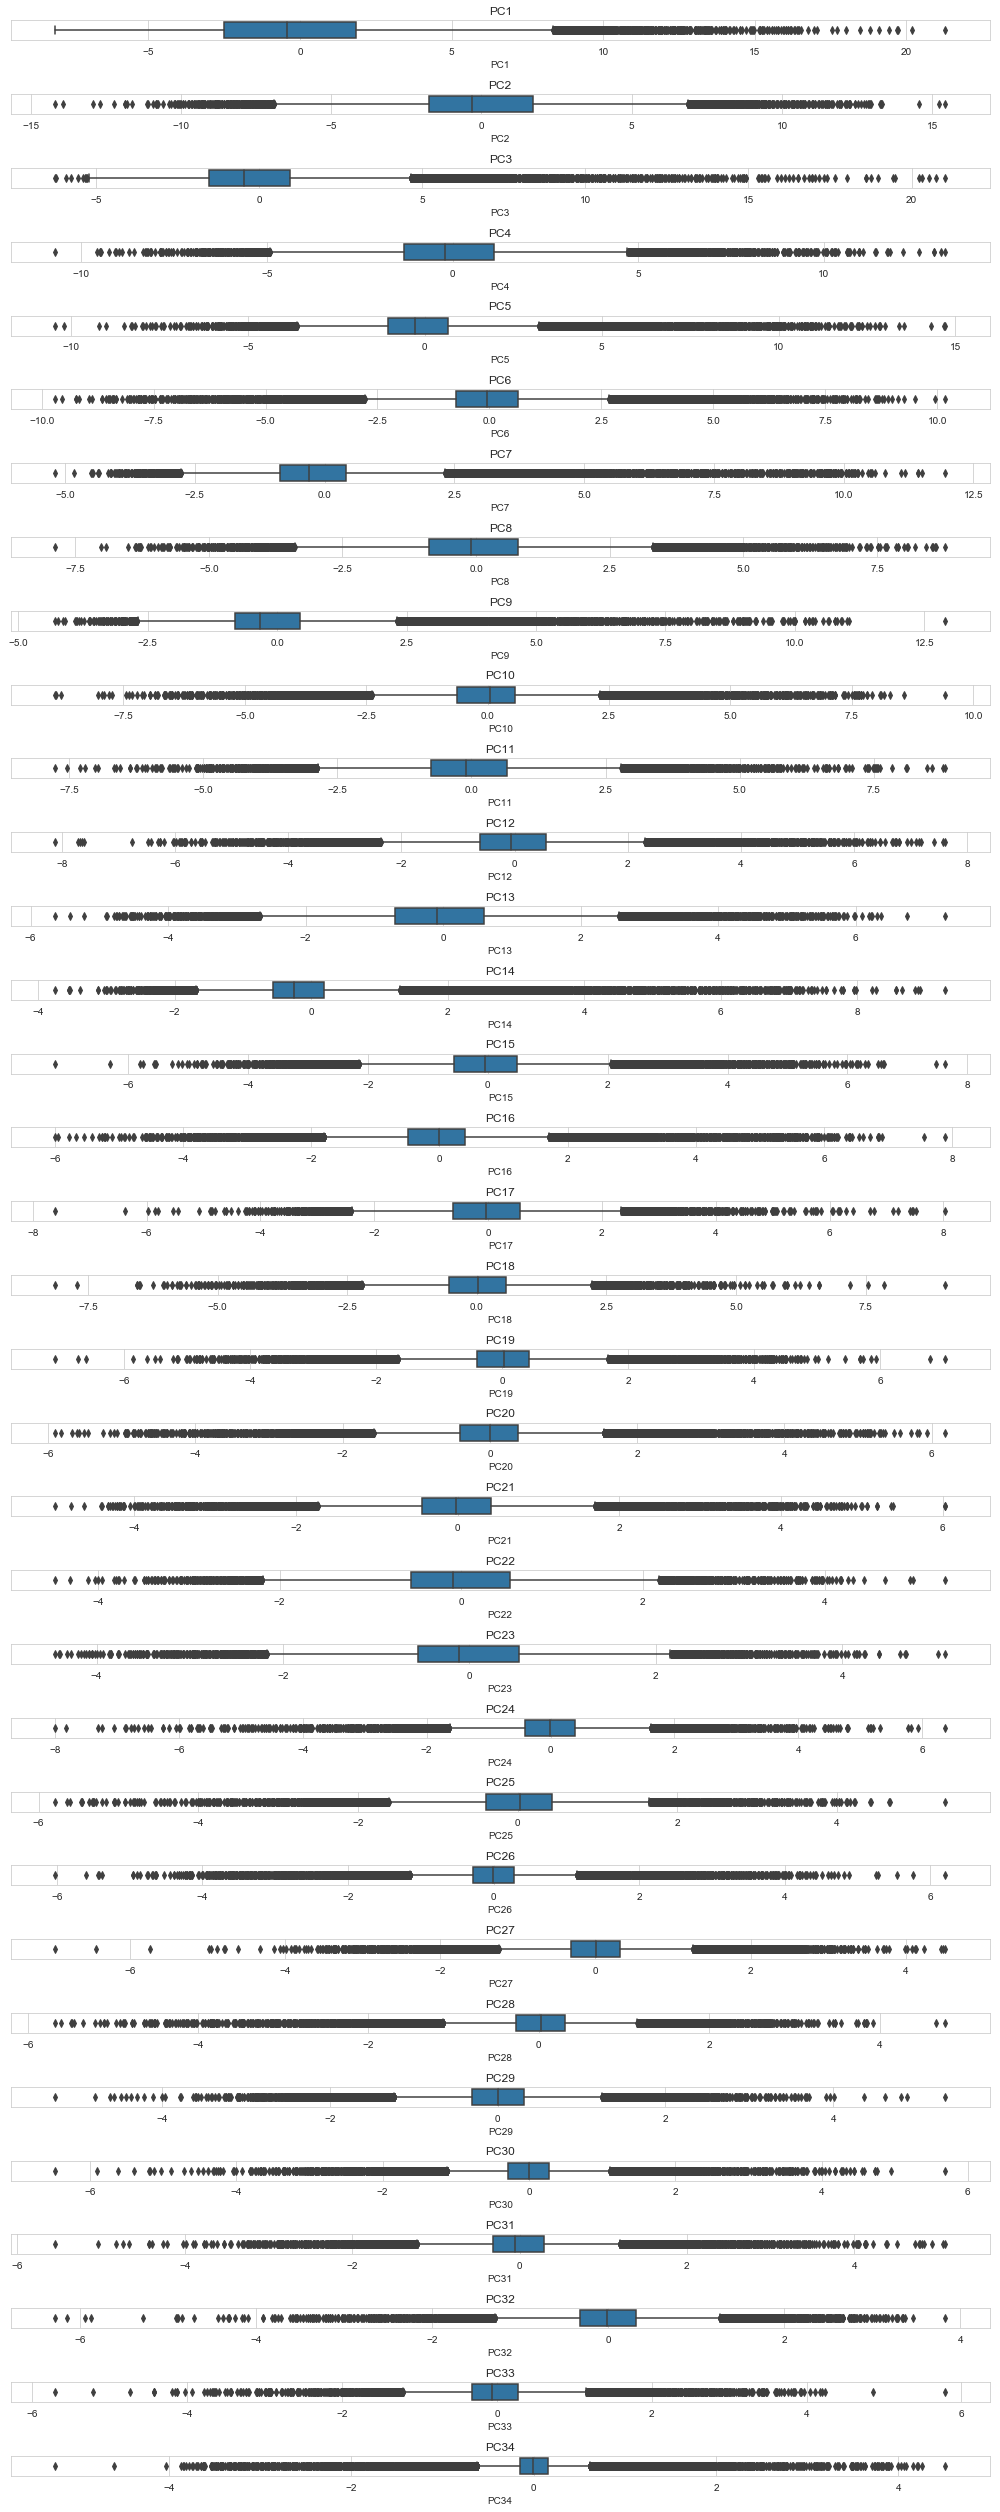

In [103]:
check_outliers_continuous(df_pc_34, df_pc_34.columns)

In [104]:
df_pc_34.describe([0,0.05, 0.25,0.50,0.75,0.90,0.95,0.99])

PC1           PC2           PC3           PC4           PC5  \
count  3.000100e+04  3.000100e+04  3.000100e+04  3.000100e+04  3.000100e+04   
mean   4.923305e-17 -1.100416e-16  1.983532e-17  2.821353e-17  3.631048e-17   
std    3.481846e+00  2.949337e+00  2.421627e+00  2.199326e+00  2.040314e+00   
min   -8.070410e+00 -1.418244e+01 -6.257842e+00 -1.070560e+01 -1.044716e+01   
0%    -8.070410e+00 -1.418244e+01 -6.257842e+00 -1.070560e+01 -1.044716e+01   
5%    -4.693764e+00 -4.522840e+00 -2.803972e+00 -3.207446e+00 -2.581129e+00   
25%   -2.495014e+00 -1.736435e+00 -1.542925e+00 -1.302934e+00 -1.044118e+00   
50%   -4.283627e-01 -3.032804e-01 -4.836750e-01 -2.039183e-01 -2.869696e-01   
75%    1.841562e+00  1.701791e+00  9.296279e-01  1.105947e+00  6.661898e-01   
90%    4.541294e+00  3.866276e+00  2.859313e+00  2.712056e+00  2.032119e+00   
95%    6.498708e+00  5.121036e+00  4.423059e+00  3.914718e+00  3.660157e+00   
99%    1.073463e+01  8.155577e+00  8.832142e+00  6.562969e+00  8.031444e+00   
max    2.128427e+01  1.543156e+01  2.103560e+01  1.327829e+01  1.471324e+01   

                PC6           PC7           PC8           PC9          PC10  \
count  3.000100e+04  3.000100e+04  3.000100e+04  3.000100e+04  3.000100e+04   
mean   6.553798e-17 -1.136090e-17 -1.026552e-16 -1.160885e-17  5.010917e-17   
std    1.764712e+00  1.663546e+00  1.526097e+00  1.465537e+00  1.419936e+00   
min   -9.696815e+00 -5.188875e+00 -7.873556e+00 -4.285445e+00 -8.905709e+00   
0%    -9.696815e+00 -5.188875e+00 -7.873556e+00 -4.285445e+00 -8.905709e+00   
5%    -2.742143e+00 -1.875244e+00 -2.292250e+00 -1.659752e+00 -2.243476e+00   
25%   -7.373676e-01 -8.587284e-01 -8.826509e-01 -8.176711e-01 -6.212560e-01   
50%   -5.859899e-02 -3.048591e-01 -1.032583e-01 -3.248820e-01  5.303919e-02   
75%    6.294474e-01  4.132700e-01  7.926659e-01  4.374338e-01  5.540638e-01   
90%    2.008733e+00  1.637211e+00  1.804388e+00  1.689669e+00  1.405073e+00   
95%    3.075436e+00  2.945338e+00  2.594399e+00  2.751890e+00  2.215831e+00   
99%    5.332773e+00  7.233285e+00  4.593460e+00  5.626932e+00  4.524799e+00   
max    1.018025e+01  1.195672e+01  8.776637e+00  1.290466e+01  9.425922e+00   

               PC11          PC12          PC13          PC14          PC15  \
count  3.000100e+04  3.000100e+04  3.000100e+04  3.000100e+04  3.000100e+04   
mean   7.416043e-18 -1.066972e-16  6.090480e-17  7.101374e-17  2.898696e-17   
std    1.354138e+00  1.283673e+00  1.246897e+00  1.178731e+00  1.159917e+00   
min   -7.759015e+00 -8.121695e+00 -5.641219e+00 -3.750525e+00 -7.217989e+00   
0%    -7.759015e+00 -8.121695e+00 -5.641219e+00 -3.750525e+00 -7.217989e+00   
5%    -2.007157e+00 -1.976409e+00 -1.886034e+00 -1.275871e+00 -1.799022e+00   
25%   -7.467103e-01 -6.154747e-01 -7.042315e-01 -5.644025e-01 -5.682538e-01   
50%   -1.072164e-01 -6.010483e-02 -8.235233e-02 -2.460012e-01 -4.527603e-02   
75%    6.698868e-01  5.545177e-01  6.003325e-01  1.837778e-01  4.824377e-01   
90%    1.630442e+00  1.453541e+00  1.479327e+00  1.237418e+00  1.305492e+00   
95%    2.323974e+00  2.163050e+00  2.201052e+00  2.249326e+00  1.995228e+00   
99%    3.930870e+00  4.028026e+00  3.814543e+00  5.070791e+00  3.670305e+00   
max    8.831643e+00  7.613798e+00  7.302904e+00  9.290040e+00  7.631566e+00   

               PC16          PC17          PC18          PC19          PC20  \
count  3.000100e+04  3.000100e+04  3.000100e+04  3.000100e+04  3.000100e+04   
mean   4.663706e-17  6.546582e-17 -5.906190e-18  7.026552e-18 -5.083819e-17   
std    1.110612e+00  1.065693e+00  1.031522e+00  9.672349e-01  9.525647e-01   
min   -5.993301e+00 -7.606947e+00 -8.136444e+00 -7.099636e+00 -5.903310e+00   
0%    -5.993301e+00 -7.606947e+00 -8.136444e+00 -7.099636e+00 -5.903310e+00   
5%    -1.648967e+00 -1.646892e+00 -1.626447e+00 -1.564068e+00 -1.443576e+00   
25%   -4.828012e-01 -6.204627e-01 -5.473762e-01 -4.034198e-01 -4.063327e-01   
50%   -1.346965e-02 -4.026101e-02  2.177100e-02  2.069407e-02  

<font color="blue">Data Interpretation on Outliers for Principal Components 
- Not removing any outliers on principal components. 
- Principal components do have outliers but the data does not seem to outlie significantly.
- They were earlier treated in the main dataset.

In [105]:
df_pc_34['churn'] = df_churn['churn'].values
df_pc_34['mobile_number'] = df_churn['mobile_number'].values
df_pc_34.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.553313 -0.359261 -0.833162 -2.509668 -1.159040  0.060565 -0.344119   
1  8.588622 -4.046527  2.494160 -6.443236  2.483801 -1.639906  0.408439   
2 -2.700738  0.779598 -0.500083  0.901762 -0.690733  0.450954 -0.090495   
3  0.952397  3.595846 -0.124266  0.441052  1.092903 -2.683567 -1.437716   
4 -1.742347 -0.819174 -0.525532  0.018698  0.534678  0.139272 -1.032004   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.836732 -0.772648  0.388477 -0.863293  0.034372  1.004056 -0.460140   
1  8.422242  1.109832 -0.510242  0.762082  0.288301 -1.115210  6.766278   
2 -0.925972  0.517730  1.185147  0.443882 -0.215145 -0.836433 -0.216103   
3 -0.969531 -1.316127 -0.169828 -0.732696 -0.106118 -1.246665 -0.514672   
4 -0.209365  1.827808  0.848057 -2.419407 -0.822824 -0.361339  3.458987   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0 -1.121671  0.563572  0.149456 -0.090164  0.097943 -0.121306  0.692201   
1 -3.583457  1.085659  4.640775 -2.536050  2.983065 -0.575716  0.705587   
2  0.355560 -0.264312  0.495322  0.267673 -0.134358  0.036138 -0.743637   
3  0.459190 -0.624612  1.064293 -0.327709  0.493140 -0.588670  0.161345   
4 -2.800368 -0.594651 -0.603554  1.296020 -0.639664  0.072679  0.072214   

       PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0 -0.154404 -0.300036  0.236286 -0.131839 -0.179857  0.053244 -0.238210   
1 -0.953845 -1.133080  2.266742  2.558968  0.504012 -1.588543  1.228380   
2  0.728493 -1.356220  1.218178 -0.329664 -0.410518 -0.351440  0.675569   
3  0.237407  0.049768  0.103065 -0.165018 -0.441901  0.111774  0.317794   
4  1.314432 -2.480984 -0.948808  0.160051 -0.304966  1.838559  2.169658   

       PC29      PC30      PC31      PC32      PC33      PC34  churn  \
0 -0.098237 -0.066191 -0.494947  1.022450 -0.102252  0.086905      1   
1 -0.001264  0.488851  0.206877 -3.803278  0.521735  0.726882      1   
2  0.176139  0.411694 -0.535289  0.200944  0.185004  0.102484      0   
3  0.377840  0.301762 -0.332054  0.453844  0.391337  0.205434      0   
4 -0.629104  0.333844  0.312578 -0.104473  0.182977  0.321773      0   

   mobile_number  
0     7000842753  
1     7000701601  
2     7001524846  
3     7002124215  
4     7000887461

<a id="split"></a>
# 5. Split Data into Training and Test Sets 

In [106]:
np.random.seed(0)
df_train, df_test = train_test_split(df_pc_34, train_size = 0.7, random_state = 100)
print("Train Shape:", df_train.shape, "Test Shape:", df_test.shape)

Train Shape: (21000, 36) Test Shape: (9001, 36)


In [107]:
# Putting feature variable to X
X = df_pc_34.drop(['churn'], axis=1)
X.set_index('mobile_number', inplace=True)
X.head()

PC1       PC2       PC3       PC4       PC5       PC6  \
mobile_number                                                               
7000842753    -3.553313 -0.359261 -0.833162 -2.509668 -1.159040  0.060565   
7000701601     8.588622 -4.046527  2.494160 -6.443236  2.483801 -1.639906   
7001524846    -2.700738  0.779598 -0.500083  0.901762 -0.690733  0.450954   
7002124215     0.952397  3.595846 -0.124266  0.441052  1.092903 -2.683567   
7000887461    -1.742347 -0.819174 -0.525532  0.018698  0.534678  0.139272   

                    PC7       PC8       PC9      PC10      PC11      PC12  \
mobile_number                                                               
7000842753    -0.344119  0.836732 -0.772648  0.388477 -0.863293  0.034372   
7000701601     0.408439  8.422242  1.109832 -0.510242  0.762082  0.288301   
7001524846    -0.090495 -0.925972  0.517730  1.185147  0.443882 -0.215145   
7002124215    -1.437716 -0.969531 -1.316127 -0.169828 -0.732696 -0.106118   
7000887461    -1.032004 -0.209365  1.827808  0.848057 -2.419407 -0.822824   

                   PC13      PC14      PC15      PC16      PC17      PC18  \
mobile_number                                                               
7000842753     1.004056 -0.460140 -1.121671  0.563572  0.149456 -0.090164   
7000701601    -1.115210  6.766278 -3.583457  1.085659  4.640775 -2.536050   
7001524846    -0.836433 -0.216103  0.355560 -0.264312  0.495322  0.267673   
7002124215    -1.246665 -0.514672  0.459190 -0.624612  1.064293 -0.327709   
7000887461    -0.361339  3.458987 -2.800368 -0.594651 -0.603554  1.296020   

                   PC19      PC20      PC21      PC22      PC23      PC24  \
mobile_number                                                               
7000842753     0.097943 -0.121306  0.692201 -0.154404 -0.300036  0.236286   
7000701601     2.983065 -0.575716  0.705587 -0.953845 -1.133080  2.266742   
7001524846    -0.134358  0.036138 -0.743637  0.728493 -1.356220  1.218178   
7002124215     0.493140 -0.588670  0.161345  0.237407  0.049768  0.103065   
7000887461    -0.639664  0.072679  0.072214  1.314432 -2.480984 -0.948808   

                   PC25      PC26      PC27      PC28      PC29      PC30  \
mobile_number                                                               
7000842753    -0.131839 -0.179857  0.053244 -0.238210 -0.098237 -0.066191   
7000701601     2.558968  0.504012 -1.588543  1.228380 -0.001264  0.488851   
7001524846    -0.329664 -0.410518 -0.351440  0.675569  0.176139  0.411694   
7002124215    -0.165018 -0.441901  0.111774  0.317794  0.377840  0.301762   
7000887461     0.160051 -0.304966  1.838559  2.169658 -0.629104  0.333844   

                   PC31      PC32      PC33      PC34  
mobile_number                                          
7000842753    -0.494947  1.022450 -0.102252  0.086905  
7000701601     0.206877 -3.803278  0.521735  0.726882  
7001524846    -0.535289  0.200944  0.185004  0.102484  
7002124215    -0.332054  0.453844  0.391337  0.205434  
7000887461     0.312578 -0.104473  0.182977  0.321773

In [108]:
# Putting response variable to y
y = df_pc_34[['churn','mobile_number']]
y.set_index('mobile_number', inplace=True)
y = y['churn']
y.head()

mobile_number
7000842753    1
7000701601    1
7001524846    0
7002124215    0
7000887461    0
Name: churn, dtype: int32

In [109]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

<a id="train"></a>
# 6. Training the Model 

<a id="MMS"></a>
### 6.1 MinMax Scaling

Not needed. Done during PCA.

<a id="RFE"></a>
### 6.2 RFE (Recursive Feature Elimination)

In [110]:
log = LogisticRegression()
log.fit(X_train, y_train)
rfe = RFE(log, 5)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('PC1', True, 1),
 ('PC2', True, 1),
 ('PC3', False, 9),
 ('PC4', False, 3),
 ('PC5', False, 22),
 ('PC6', False, 29),
 ('PC7', False, 20),
 ('PC8', False, 7),
 ('PC9', False, 11),
 ('PC10', False, 27),
 ('PC11', True, 1),
 ('PC12', False, 14),
 ('PC13', False, 16),
 ('PC14', False, 23),
 ('PC15', False, 18),
 ('PC16', False, 24),
 ('PC17', False, 21),
 ('PC18', False, 8),
 ('PC19', False, 28),
 ('PC20', False, 30),
 ('PC21', False, 13),
 ('PC22', False, 15),
 ('PC23', False, 10),
 ('PC24', False, 17),
 ('PC25', False, 26),
 ('PC26', False, 25),
 ('PC27', True, 1),
 ('PC28', False, 12),
 ('PC29', True, 1),
 ('PC30', False, 2),
 ('PC31', False, 6),
 ('PC32', False, 5),
 ('PC33', False, 4),
 ('PC34', False, 19)]

In [111]:
feature_cols = list(X_train.columns[rfe.support_])
feature_cols

['PC1', 'PC2', 'PC11', 'PC27', 'PC29']

<a id="STATS"></a>
### 6.3 Building model using statsmodel, for the detailed statistics

In [112]:
# function for listing vif
def vif_list(X_train):
    vif = pd.DataFrame()
    vif['features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif = vif.sort_values(by='VIF', ascending=False)
    print(vif)

# function for listing model
def model(features):
    X_train_rfe = X_train[features]
    X_train_rfe = sm.add_constant(X_train_rfe)
    log = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial()).fit()
    print(log.summary())
    vif_list(X_train[features])
    return log

**Model #1**

In [113]:
log_1 = model(feature_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20994
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4630.9
Date:                Mon, 04 Nov 2019   Deviance:                       9261.9
Time:                        22:02:10   Pearson chi2:                 4.94e+04
No. Iterations:                     8   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4530      0.052    -66.452      0.000      -3.555      -3.351
PC1           -0.3588      0.014    -26.408      0.0

## 7. Model Evaluation

<a id="Predictions"></a>
### 7.1 Predictions

In [114]:
# Getting the predicted values on the train set
y_train_pred = log_1.predict(sm.add_constant(X_train[feature_cols]))
y_train_pred[:10]

mobile_number
7001454064    0.022008
7001929370    0.059658
7000952221    0.013662
7000752154    0.000173
7000346259    0.006893
7000143624    0.027258
7001230020    0.005880
7001862371    0.011034
7002164077    0.086885
7000996001    0.064092
dtype: float64

In [115]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.02200761, 0.05965801, 0.01366162, 0.00017298, 0.0068927 ,
       0.02725805, 0.00587994, 0.01103359, 0.08688522, 0.06409154])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [116]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_Prob':y_train_pred})
y_train_pred_final['mobile_number'] = y_train.index
y_train_pred_final.head(20)

churn  churn_Prob  mobile_number
0       0    0.022008     7001454064
1       0    0.059658     7001929370
2       0    0.013662     7000952221
3       0    0.000173     7000752154
4       0    0.006893     7000346259
5       0    0.027258     7000143624
6       0    0.005880     7001230020
7       0    0.011034     7001862371
8       0    0.086885     7002164077
9       0    0.064092     7000996001
10      0    0.161375     7002281849
11      0    0.059855     7000789073
12      0    0.040398     7000260151
13      0    0.037565     7001287068
14      0    0.005869     7001950295
15      0    0.217473     7000937704
16      0    0.276346     7000220821
17      0    0.003144     7001685103
18      1    0.055818     7000328009
19      0    0.076580     7000721282

<a id="ROC"></a>
### 7.2 ROC Curve

In [117]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [118]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.churn, y_train_pred_final.churn_Prob, drop_intermediate = False )

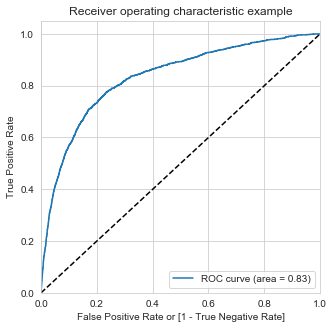

In [119]:
draw_roc(y_train_pred_final.churn, y_train_pred_final.churn_Prob)

  Data Interpretation of ROC Curve 
 - The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
 - The curve seems to be good for our model.

<a id="FOCP"></a>
### 7.3 Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [120]:
# Columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(20)

churn  churn_Prob  mobile_number  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0       0    0.022008     7001454064    1    0    0    0    0    0    0    0   
1       0    0.059658     7001929370    1    0    0    0    0    0    0    0   
2       0    0.013662     7000952221    1    0    0    0    0    0    0    0   
3       0    0.000173     7000752154    1    0    0    0    0    0    0    0   
4       0    0.006893     7000346259    1    0    0    0    0    0    0    0   
5       0    0.027258     7000143624    1    0    0    0    0    0    0    0   
6       0    0.005880     7001230020    1    0    0    0    0    0    0    0   
7       0    0.011034     7001862371    1    0    0    0    0    0    0    0   
8       0    0.086885     7002164077    1    0    0    0    0    0    0    0   
9       0    0.064092     7000996001    1    0    0    0    0    0    0    0   
10      0    0.161375     7002281849    1    1    0    0    0    0    0    0   
11      0    0.059855     7000789073    1    0    0    0    0    0    0    0   
12      0    0.040398     7000260151    1    0    0    0    0    0    0    0   
13      0    0.037565     7001287068    1    0    0    0    0    0    0    0   
14      0    0.005869     7001950295    1    0    0    0    0    0    0    0   
15      0    0.217473     7000937704    1    1    1    0    0    0    0    0   
16      0    0.276346     7000220821    1    1    1    0    0    0    0    0   
17      0    0.003144     7001685103    1    0    0    0    0    0    0    0   
18      1    0.055818     7000328009    1    0    0    0    0    0    0    0   
19      0    0.076580     7000721282    1    0    0    0    0    0    0    0   

    0.8  0.9  
0     0    0  
1     0    0  
2     0    0  
3     0    0  
4     0    0  
5     0    0  
6     0    0  
7     0    0  
8     0    0  
9     0    0  
10    0    0  
11    0    0  
12    0    0  
13    0    0  
14    0    0  
15    0    0  
16    0    0  
17    0    0  
18    0    0  
19    0    0

In [121]:
# Accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','TN','FP','FN','TP'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    TN = cm1[0,0]
    FP = cm1[0,1]
    FN = cm1[1,0]
    TP = cm1[1,1]
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,TN,FP,FN,TP]
print(cutoff_df)

     prob  accuracy     sensi     speci       TN       FP      FN      TP
0.0   0.0  0.080524  1.000000  0.000000      0.0  19309.0     0.0  1691.0
0.1   0.1  0.777143  0.759905  0.778652  15035.0   4274.0   406.0  1285.0
0.2   0.2  0.891714  0.492608  0.926666  17893.0   1416.0   858.0   833.0
0.3   0.3  0.917095  0.277942  0.973070  18789.0    520.0  1221.0   470.0
0.4   0.4  0.920762  0.148433  0.988399  19085.0    224.0  1440.0   251.0
0.5   0.5  0.921048  0.079243  0.994769  19208.0    101.0  1557.0   134.0
0.6   0.6  0.920476  0.040213  0.997566  19262.0     47.0  1623.0    68.0
0.7   0.7  0.920143  0.020106  0.998964  19289.0     20.0  1657.0    34.0
0.8   0.8  0.919619  0.005914  0.999637  19302.0      7.0  1681.0    10.0
0.9   0.9  0.919762  0.004140  0.999948  19308.0      1.0  1684.0     7.0


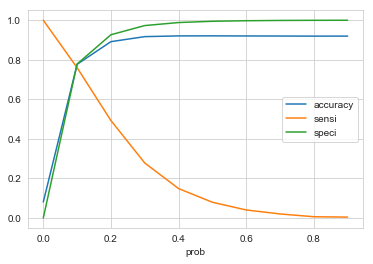

In [122]:
# Plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.1 seems to be the optimum point to take it as a cutoff probability.

In [123]:
y_train_pred_final['predicted'] = y_train_pred_final.churn_Prob.map( lambda x: 1 if x > 0.1 else 0)
y_train_pred_final.head(20)

churn  churn_Prob  mobile_number  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0       0    0.022008     7001454064    1    0    0    0    0    0    0    0   
1       0    0.059658     7001929370    1    0    0    0    0    0    0    0   
2       0    0.013662     7000952221    1    0    0    0    0    0    0    0   
3       0    0.000173     7000752154    1    0    0    0    0    0    0    0   
4       0    0.006893     7000346259    1    0    0    0    0    0    0    0   
5       0    0.027258     7000143624    1    0    0    0    0    0    0    0   
6       0    0.005880     7001230020    1    0    0    0    0    0    0    0   
7       0    0.011034     7001862371    1    0    0    0    0    0    0    0   
8       0    0.086885     7002164077    1    0    0    0    0    0    0    0   
9       0    0.064092     7000996001    1    0    0    0    0    0    0    0   
10      0    0.161375     7002281849    1    1    0    0    0    0    0    0   
11      0    0.059855     7000789073    1    0    0    0    0    0    0    0   
12      0    0.040398     7000260151    1    0    0    0    0    0    0    0   
13      0    0.037565     7001287068    1    0    0    0    0    0    0    0   
14      0    0.005869     7001950295    1    0    0    0    0    0    0    0   
15      0    0.217473     7000937704    1    1    1    0    0    0    0    0   
16      0    0.276346     7000220821    1    1    1    0    0    0    0    0   
17      0    0.003144     7001685103    1    0    0    0    0    0    0    0   
18      1    0.055818     7000328009    1    0    0    0    0    0    0    0   
19      0    0.076580     7000721282    1    0    0    0    0    0    0    0   

    0.8  0.9  predicted  
0     0    0          0  
1     0    0          0  
2     0    0          0  
3     0    0          0  
4     0    0          0  
5     0    0          0  
6     0    0          0  
7     0    0          0  
8     0    0          0  
9     0    0          0  
10    0    0          1  
11    0    0          0  
12    0    0          0  
13    0    0          0  
14    0    0          0  
15    0    0          1  
16    0    0          1  
17    0    0          0  
18    0    0          0  
19    0    0          0

In [124]:
# Overall accuracy.
metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.predicted)

0.7771428571428571

78% accuracy is good

In [125]:
confusion = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.predicted )
confusion

array([[15035,  4274],
       [  406,  1285]], dtype=int64)

In [126]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [127]:
# Sensitivity (or True Positive Rate (TPR)) of our logistic regression model
TP / float(TP+FN)

0.7599053814311059

Of all the positives 76% were detected

In [128]:
# Specificity (or False Positive Rate (FPR))
TN / float(TN+FP)

0.7786524418664871

Of all the negatives 78% were detected

  Data Interpretation of Accuracy, Sensitivity and Specificity 
 - Accuracy of 78%
 - Sensitivity of 776
 - Specificity of 78%
 
All our good values (approx. 80%) and consistent with each other suggests that the model is good.

<b>Taking Accuracy, Specificity and Sensitivity as the metrics for the case study.</b>

Hence not calculating precision and recall and not drawing their trade-off graph.

<a id="ALS"></a>
### 7.4 Assign Churn Score

In [129]:
y_train_pred_final['Churn Score'] = y_train_pred_final.churn_Prob.map(lambda x:round(x*100))
y_train_pred_final.head()

churn  churn_Prob  mobile_number  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0      0    0.022008     7001454064    1    0    0    0    0    0    0    0   
1      0    0.059658     7001929370    1    0    0    0    0    0    0    0   
2      0    0.013662     7000952221    1    0    0    0    0    0    0    0   
3      0    0.000173     7000752154    1    0    0    0    0    0    0    0   
4      0    0.006893     7000346259    1    0    0    0    0    0    0    0   

   0.8  0.9  predicted  Churn Score  
0    0    0          0            2  
1    0    0          0            6  
2    0    0          0            1  
3    0    0          0            0  
4    0    0          0            1

<a id="MPTS"></a>
## 8. Making predictions on the test set

Scaling Not needed. Done during PCA.

In [130]:
X_test = X_test[feature_cols]
X_test.head()

PC1       PC2      PC11      PC27      PC29
mobile_number                                                  
7000912554    -2.537893  0.583362  0.122984 -0.102918 -0.077647
7000409110    -4.699616  0.657873 -0.066395 -0.210942  0.617489
7000903241     3.984064 -1.431742  0.162715 -0.024074  0.152988
7001270385    -0.419892  0.497683  0.131911 -0.683449 -0.362712
7000931357    -2.146884 -0.351918  2.438399 -0.798681  0.408209

In [131]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [132]:
y_test_pred = log_1.predict(X_test_sm)

In [133]:
y_test_pred[:10]

mobile_number
7000912554    0.102914
7000409110    0.158633
7000903241    0.004952
7001270385    0.072716
7000931357    0.331603
7001809981    0.008051
7001434577    0.073576
7001738563    0.023113
7000826660    0.014737
7000309026    0.179902
dtype: float64

In [134]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [135]:
# Let's see the head
y_pred_1.head()

0
mobile_number          
7000912554     0.102914
7000409110     0.158633
7000903241     0.004952
7001270385     0.072716
7000931357     0.331603

In [136]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [137]:
# Putting Lead Number to index
y_test_df['mobile_number'] = y_test_df.index

In [138]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


In [139]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [140]:
y_pred_final.head()

churn  mobile_number         0
0      1     7000912554  0.102914
1      1     7000409110  0.158633
2      0     7000903241  0.004952
3      0     7001270385  0.072716
4      1     7000931357  0.331603

In [141]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'churn_Prob'})

In [142]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['mobile_number','churn','churn_Prob'], axis=1)

In [143]:
# Let's see the head of y_pred_final
y_pred_final.head()

mobile_number  churn  churn_Prob
0     7000912554      1    0.102914
1     7000409110      1    0.158633
2     7000903241      0    0.004952
3     7001270385      0    0.072716
4     7000931357      1    0.331603

In [144]:
y_pred_final['predicted'] = y_pred_final.churn_Prob.map(lambda x: 1 if x > 0.1 else 0)

In [145]:
y_pred_final.head()

mobile_number  churn  churn_Prob  predicted
0     7000912554      1    0.102914          1
1     7000409110      1    0.158633          1
2     7000903241      0    0.004952          0
3     7001270385      0    0.072716          0
4     7000931357      1    0.331603          1

In [146]:
# Overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.predicted)

0.7846905899344517

In [147]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.predicted )
confusion2

array([[6481, 1770],
       [ 168,  582]], dtype=int64)

In [148]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [149]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.776

In [150]:
# Specificity
TN / float(TN+FP)

0.7854805478123864

  Data Interpretation of Accuracy, Sensitivity and Specificity on Test Data 
 - Accuracy of 78%
 - Sensitivity of 78%
 - Specificity of 79%
 
All our good values (approx. 80%) and consistent with mthe trained model. Suggesting the model was well trained.

**Assigning Lead Score on Test Data**

In [151]:
y_pred_final['churn score'] = y_pred_final.churn_Prob.map(lambda x:round(x*100))
y_pred_final.head()

mobile_number  churn  churn_Prob  predicted  churn score
0     7000912554      1    0.102914          1           10
1     7000409110      1    0.158633          1           16
2     7000903241      0    0.004952          0            0
3     7001270385      0    0.072716          0            7
4     7000931357      1    0.331603          1           33

A higher score (above 10) would mean that the customer churn is high, i.e. is most likely to happen whereas a lower score would mean that the customer churn will most likely not happen.

<a id="RF"></a>
## 9. Random Forest - Hyperparameter Tuning

In [152]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Default Hyperparameters
Fitting a random forest model with default hyperparameters.

In [153]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [154]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [155]:
# Making predictions
predictions = rfc.predict(X_test)

In [156]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8251
           1       0.61      0.20      0.30       750

   micro avg       0.92      0.92      0.92      9001
   macro avg       0.77      0.59      0.63      9001
weighted avg       0.90      0.92      0.90      9001



In [157]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[8156   95]
 [ 600  150]]


In [158]:
print(accuracy_score(y_test,predictions))

0.9227863570714365


<font color="blue">Data Interpretation of Random Forest Model Metrics 
 - The values of accuracy, precision, recall and f1-score are good, suggesting it's a good model

### Hyperparameter Tuning

#### Tuning max_depth

Finding the optimum values for ```max_depth```.


In [159]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [160]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.232345      0.046357         0.010048        0.004567   
1       0.601733      0.012108         0.006250        0.007655   
2       0.875978      0.011434         0.011374        0.006090   
3       0.995496      0.014096         0.008649        0.007185   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.919305           0.919524   
1               7   {'max_depth': 7}           0.920971           0.920952   
2              12  {'max_depth': 12}           0.926684           0.923333   
3              17  {'max_depth': 17}           0.927874           0.922143   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.919524           0.919524           0.919505         0.919476   
1           0.920952           0.921905           0.925220         0.922000   
2           0.925952           0.930000           0.927840         0.926762   
3           0.921905           0.929524           0.927126         0.925714   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.000086                4            0.919519            0.919464   
1        0.001651                3            0.928389            0.930476   
2        0.002194                1            0.969641            0.969583   
3        0.003112                2            0.989583            0.990119   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.919464            0.919464            0.919469   
1            0.927738            0.926548            0.929588   
2            0.967917            0.966905            0.969526   
3            0.990357            0.986845            0.988751   

   mean_train_score  std_train_score  
0          0.919476         0.000021  
1          0.928548         0.001377  
2          0.968714         0.001112  
3          0.989131         0.001269

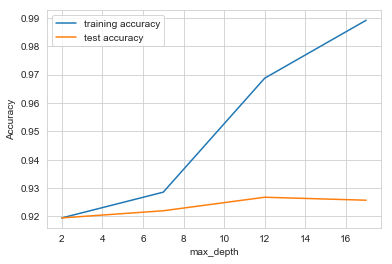

In [161]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<font color="blue">Data Interpretation for max_depth hyper parameter tuning 
- Increase in the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. 
- The ensemble tries to overfit as we increase the max_depth. 
- Controlling the depth of the constituent trees will help reduce overfitting in the forest.
- **max_depth in the range of 7 to 12 seems be the correct range for max_depth**

#### Tuning n_estimators

In [ ]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(10, 200, 20)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=7)

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<font color="blue">Data Interpretation of n_estimators 
- Accuracy score remains the same for both test and train.
- Chooing n_estimators as 100

#### Tuning max_features

Model performance varies with ```max_features```, which is the maximum number of features considered for splitting at a node.

In [166]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [5, 10, 15, 20, 25, 30]}

# instantiate the model
rf = RandomForestClassifier(max_depth=7)

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [5, 10, 15, 20, 25, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [167]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.636956      0.052540         0.007125        0.006298   
1       1.147418      0.015099         0.007125        0.006298   
2       1.678620      0.012689         0.015699        0.000148   
3       2.224625      0.003713         0.007124        0.006298   
4       2.765436      0.005510         0.011123        0.002875   

  param_max_features                params  split0_test_score  \
0                  5   {'max_features': 5}           0.919067   
1                 10  {'max_features': 10}           0.926446   
2                 15  {'max_features': 15}           0.928112   
3                 20  {'max_features': 20}           0.930493   
4                 25  {'max_features': 25}           0.930969   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.922143           0.924286           0.922143           0.920934   
1           0.924048           0.928571           0.926190           0.923077   
2           0.923810           0.926667           0.928571           0.926411   
3           0.923095           0.925714           0.929762           0.926173   
4           0.924286           0.926905           0.927143           0.926173   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.921714        0.001709                6            0.925412   
1         0.925667        0.001931                5            0.935591   
2         0.926714        0.001669                4            0.940532   
3         0.927048        0.002735                3            0.942556   
4         0.927095        0.002181                2            0.944163   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.929345            0.929048            0.926786   
1            0.935595            0.939762            0.938095   
2            0.942857            0.941488            0.940774   
3            0.942738            0.945060            0.941429   
4            0.945536            0.945060            0.942798   

   split4_train_score  mean_train_score  std_train_score  
0            0.924766          0.927071         0.001856  
1            0.935004          0.936810         0.001821  
2            0.940539          0.941238         0.000882  
3            0.944051          0.943167         0.001260  
4            0.942265          0.943964         0.001261

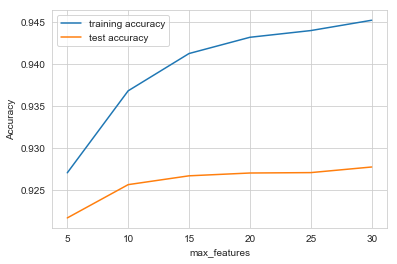

In [168]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<font color="blue">Data Interpretation for max_features hyperparameter 
- The training and test scores *both* seem to increase as we increase max_features
- After 25 max_features the test accuracy starts to dip
- **A value anywhere between 10 to 25 seems fine as there is not much change in the accuracy score.**

#### Tuning min_samples_leaf

In [169]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [170]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.633469      0.026554         0.011774        0.006052   
1       0.554381      0.008414         0.005524        0.006863   
2       0.539581      0.052755         0.010975        0.006232   
3       0.474025      0.013472         0.011775        0.006053   
4       0.453717      0.004341         0.009450        0.005828   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.920971   
1                    150  {'min_samples_leaf': 150}           0.918829   
2                    200  {'min_samples_leaf': 200}           0.919781   
3                    250  {'min_samples_leaf': 250}           0.919305   
4                    300  {'min_samples_leaf': 300}           0.919305   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.920476           0.920952           0.924048           0.920695   
1           0.920714           0.920238           0.920476           0.921886   
2           0.919286           0.920000           0.919762           0.919505   
3           0.919524           0.919524           0.919524           0.919505   
4           0.919524           0.919524           0.919524           0.919505   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.921429        0.001322                1            0.921245   
1         0.920429        0.000980                2            0.920710   
2         0.919667        0.000247                3            0.919995   
3         0.919476        0.000086                4            0.919519   
4         0.919476        0.000086                4            0.919519   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.922917            0.923750            0.921786   
1            0.922262            0.920952            0.921131   
2            0.919524            0.919881            0.919405   
3            0.919464            0.919464            0.919464   
4            0.919464            0.919464            0.919464   

   split4_train_score  mean_train_score  std_train_score  
0            0.921909          0.922321         0.000896  
1            0.921671          0.921345         0.000557  
2            0.919648          0.919690         0.000219  
3            0.919469          0.919476         0.000021  
4            0.919469          0.919476         0.000021

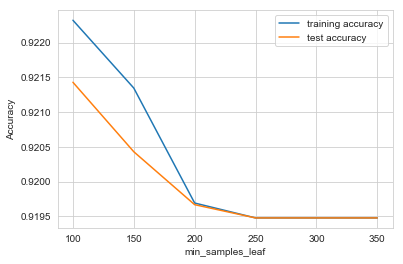

In [171]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<font color="blue">Data Interpretation for min_samples_leaf hyparameters 
- The model starts of overfit as you decrease the value of min_samples_leaf. 
- **A value in the range of 100 to 150 seems fine**

#### Tuning min_samples_split

In [172]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [173]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.940353      0.059001         0.014098        0.003050   
1       0.863295      0.016533         0.011049        0.005758   
2       0.838525      0.027569         0.008650        0.007186   
3       0.807309      0.028115         0.010250        0.005848   
4       0.809198      0.028178         0.010975        0.006232   

  param_min_samples_split                      params  split0_test_score  \
0                     200  {'min_samples_split': 200}           0.924066   
1                     250  {'min_samples_split': 250}           0.922876   
2                     300  {'min_samples_split': 300}           0.919781   
3                     350  {'min_samples_split': 350}           0.920971   
4                     400  {'min_samples_split': 400}           0.919305   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.918095           0.921905           0.922857           0.921886   
1           0.919524           0.921667           0.921190           0.920695   
2           0.919762           0.921429           0.920714           0.922362   
3           0.918571           0.920714           0.923333           0.920934   
4           0.919762           0.920000           0.919762           0.919743   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.921762        0.001999                1            0.924638   
1         0.921190        0.001104                2            0.924876   
2         0.920810        0.000996                4            0.921483   
3         0.920905        0.001509                3            0.921900   
4         0.919714        0.000226                6            0.919519   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.928036            0.925893            0.923929   
1            0.924702            0.923988            0.923393   
2            0.924702            0.923750            0.921369   
3            0.922917            0.922262            0.923452   
4            0.920000            0.921607            0.919821   

   split4_train_score  mean_train_score  std_train_score  
0            0.924826          0.925464         0.001431  
1            0.923516          0.924095         0.000603  
2            0.922505          0.922762         0.001295  
3            0.921552          0.922417         0.000687  
4            0.921731          0.920536         0.000939

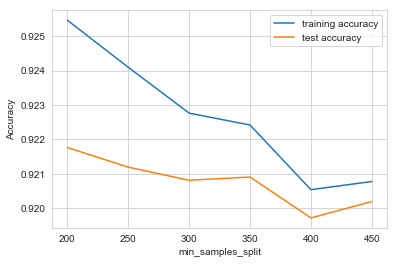

In [174]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<font color="blue">Data Interpretation for min_samples_split hyparameters 
- The model starts of overfit as you decrease the value of min_samples_split. 
- **A value in the range of 200 to 300 seems fine**

### Grid Search to Find Optimal Hyperparameters

In [177]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [7,9,12],
    'min_samples_leaf': [100, 150],
    'min_samples_split': [200, 250, 300],
    'n_estimators': [100], 
    'max_features': [10, 15, 25]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We get an accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

**Fitting the final model with the best parameters obtained from grid search.**

In [179]:
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [180]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [181]:
# predict
predictions = rfc.predict(X_test)

In [182]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [183]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8251
           1       0.58      0.08      0.13       750

   micro avg       0.92      0.92      0.92      9001
   macro avg       0.75      0.54      0.55      9001
weighted avg       0.89      0.92      0.89      9001



In [186]:
confusion_rf = confusion_matrix(y_test,predictions)
confusion_rf

array([[8210,   41],
       [ 693,   57]], dtype=int64)

In [187]:
TP = confusion_rf[1,1] # true positive 
TN = confusion_rf[0,0] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

In [185]:
# Overall accuracy.
metrics.accuracy_score(y_test, predictions)

0.9184535051660927

**The Random Forest Model has given better results (Score) than the Logistic Regression for the Churn Predition**